## 1. Importing Basic Libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/test.csv")
pd.set_option('display.max_columns', 100)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


## 2. Data Exploration , Cleaning and Handling

In [ ]:
df.shape

# Rows : 1,03,904      Columns : 25

(25976, 25)

In [ ]:
# Identify unnecesary columns

# 1. Unnamed:0
# 2. id

### Remove unnecessay features

df = df.drop(['Unnamed: 0','id'],axis=1)

In [ ]:
len(df.columns)

23

In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


In [ ]:
df.duplicated().sum()

0

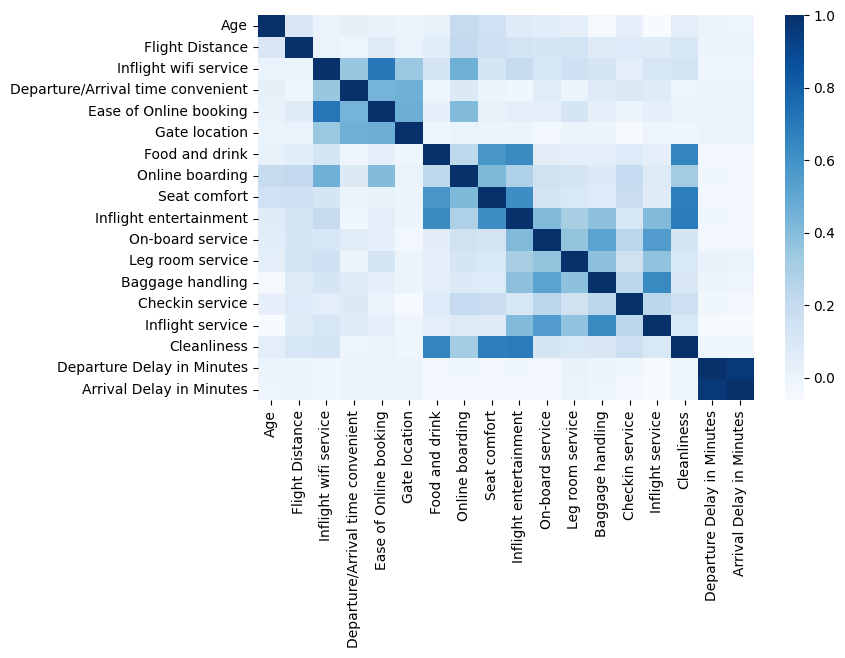

In [ ]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr , cmap="Blues")
plt.show()

In [ ]:
# Departure Delay and Arrival Delay :  highly positively correlated -- If a flight departs late, it is likely to arrive late as well

In [ ]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


#### Insights

- Arrival Delay Column:
  * The minimum arrival delay is 0 (indicating no delay).
  * The maximum arrival delay is 1584.
- Flight Distance Column:
  * The shortest flight distance in the dataset is 31(suspicious)
  * The longest flight distance in the dataset is 4983.
- Departure Delay Column:
  * The minimum departure delay is 0.
  * The maximum departure delay is 1592.
- Note:
  * There appears to be outliers in the data as there is a significant difference between the third quartile (Q3) and the maximum value.

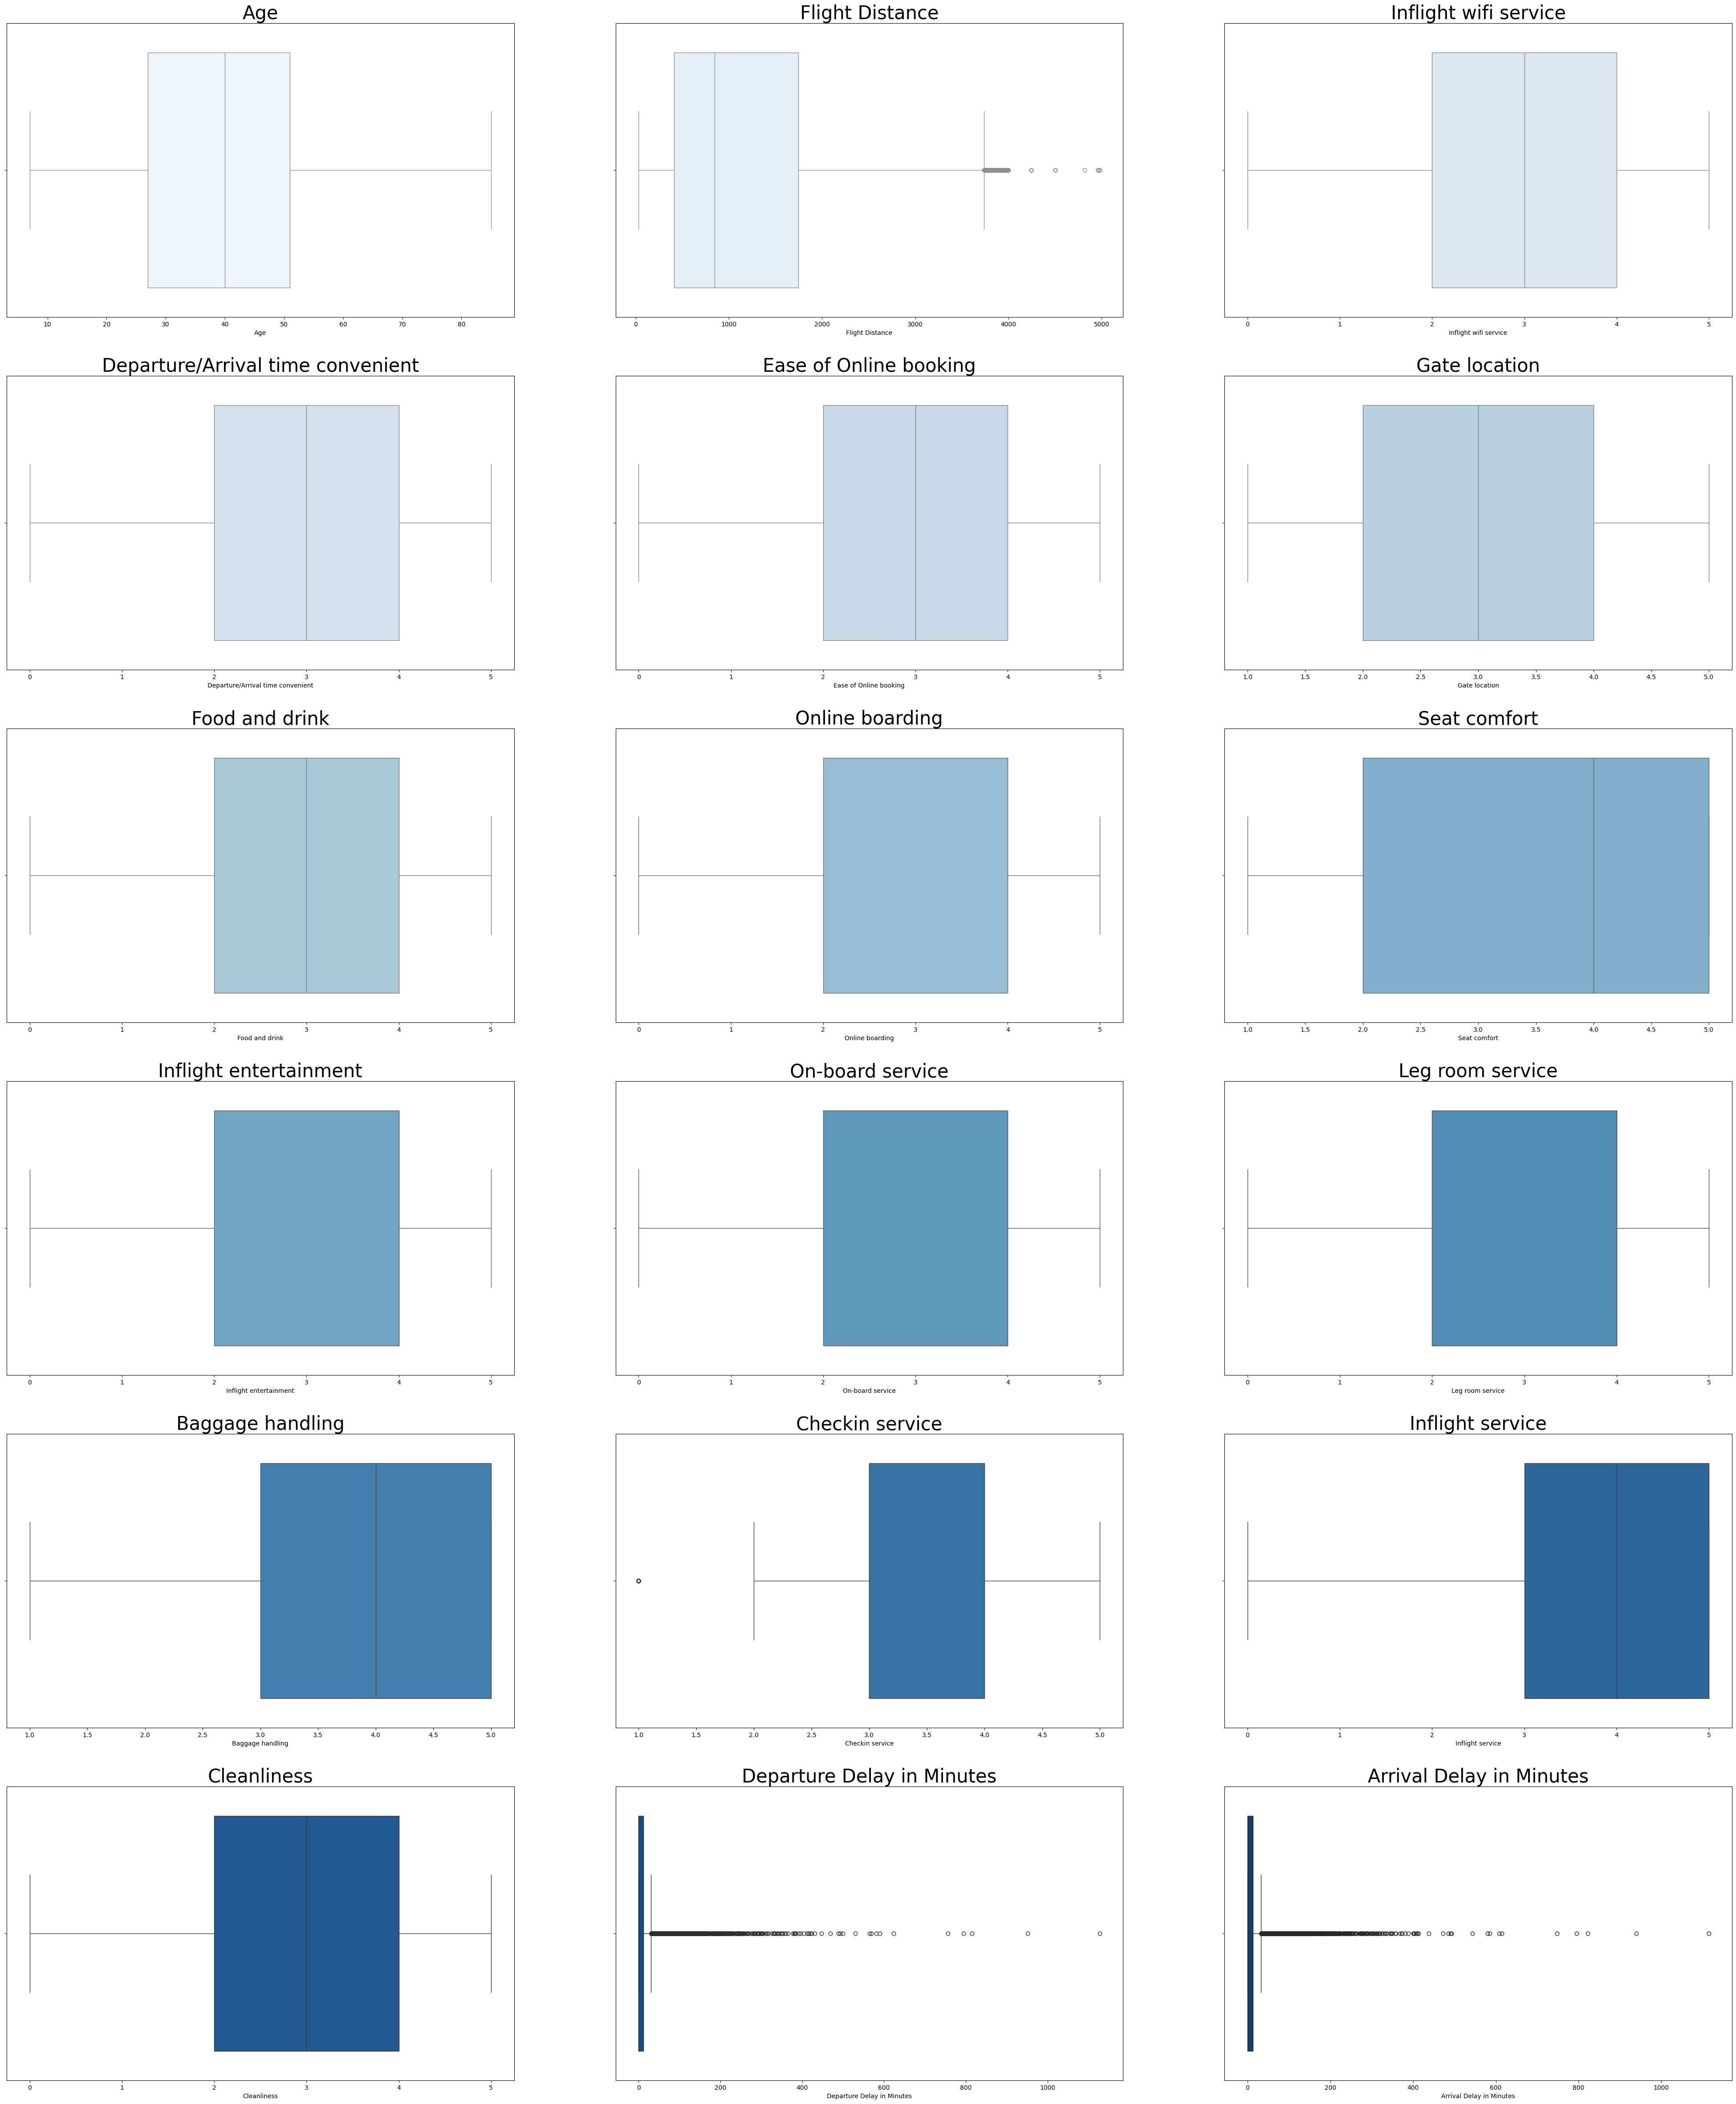

In [ ]:
### Check for Outliers

numerical = df.select_dtypes(include=['int', 'float'])
blue_palette = sns.color_palette("Blues", n_colors=len(numerical.columns))

fig, axes = plt.subplots(6, 3, figsize=(50, 60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i])
    axes[i].set_title(col, fontsize=30)

plt.show()

In [ ]:
### We know these columns have outliers :

# 1. Departure Delay ( too much )
# 2. Arrival Delay  (  too much )
# 3. Check-In service ( very less )
# 4. Flight Distance ( Moderate )

In [ ]:
### Handle Outliers

def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handel= ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes', 'Checkin service']
df = handle_outliers(df, columns_to_handel)

In [ ]:
### Handle Null values of Arrival Delay in Minutes

df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())


In [ ]:
df.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


## 3. EDA

In [ ]:
new_df = df.copy()

In [ ]:
new_df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
columns_with_six_categories = new_df.columns[new_df.nunique() == 6]
columns_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Inflight service', 'Cleanliness'],
      dtype='object')

In [ ]:
new_df["Cleanliness"].value_counts()

,count
Cleanliness,
4,6790
3,6065
5,5727
2,3981
1,3411
0,2


In [ ]:
ordinal_mapping = {
    0: "Very Poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
    5: "Outstanding"
}

In [ ]:
new_df[columns_with_six_categories] = new_df[columns_with_six_categories].applymap(lambda x: ordinal_mapping.get(x, x))

In [ ]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,Outstanding,Excellent,Good,4,Good,Excellent,3,Outstanding,Outstanding,Outstanding,5,2.0,Outstanding,Outstanding,30,32.5,satisfied


In [ ]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2.0,5,5,30,32.5,satisfied


In [ ]:
df["Baggage handling"].value_counts()

# It does not have any 0 value thats why we need another mapping for it

,count
Baggage handling,
4,9378
5,6747
3,5219
2,2841
1,1791


In [ ]:
mapping = {
    0: "Very Poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
}

new_df['Baggage handling'] = new_df['Baggage handling'].apply(lambda x: ordinal_mapping.get(x, x))

In [ ]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,Outstanding,Excellent,Good,4,Good,Excellent,3,Outstanding,Outstanding,Outstanding,Outstanding,2.0,Outstanding,Outstanding,30,32.5,satisfied


In [ ]:
df["Checkin service"].value_counts()

# It also has other type of mapping

,count
Checkin service,
4.0,7278
3.0,7007
5.0,5264
1.5,3218
2.0,3209


In [ ]:
mapping = {
    1.5: "Very Poor",
    2.0: "Poor",
    3.0: "Average",
    4.0: "Good",
    5.0: "Excellent",
}

new_df['Checkin service'] = new_df['Checkin service'].apply(lambda x: ordinal_mapping.get(x, x))

In [ ]:
new_df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,Outstanding,Excellent,Good,4,Good,Excellent,3,Outstanding,Outstanding,Outstanding,Outstanding,Average,Outstanding,Outstanding,30,32.5,satisfied


### Now alll data is set for EDA

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### UNIVARIATE EDA

In [ ]:
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class',
                       'Inflight wifi service', 'Departure/Arrival time convenient',
                       'Ease of Online booking', 'Gate location', 'Food and drink',
                       'Online boarding', 'Seat comfort', 'Inflight entertainment',
                       'On-board service', 'Leg room service', 'Baggage handling',
                       'Checkin service', 'Inflight service', 'Cleanliness']


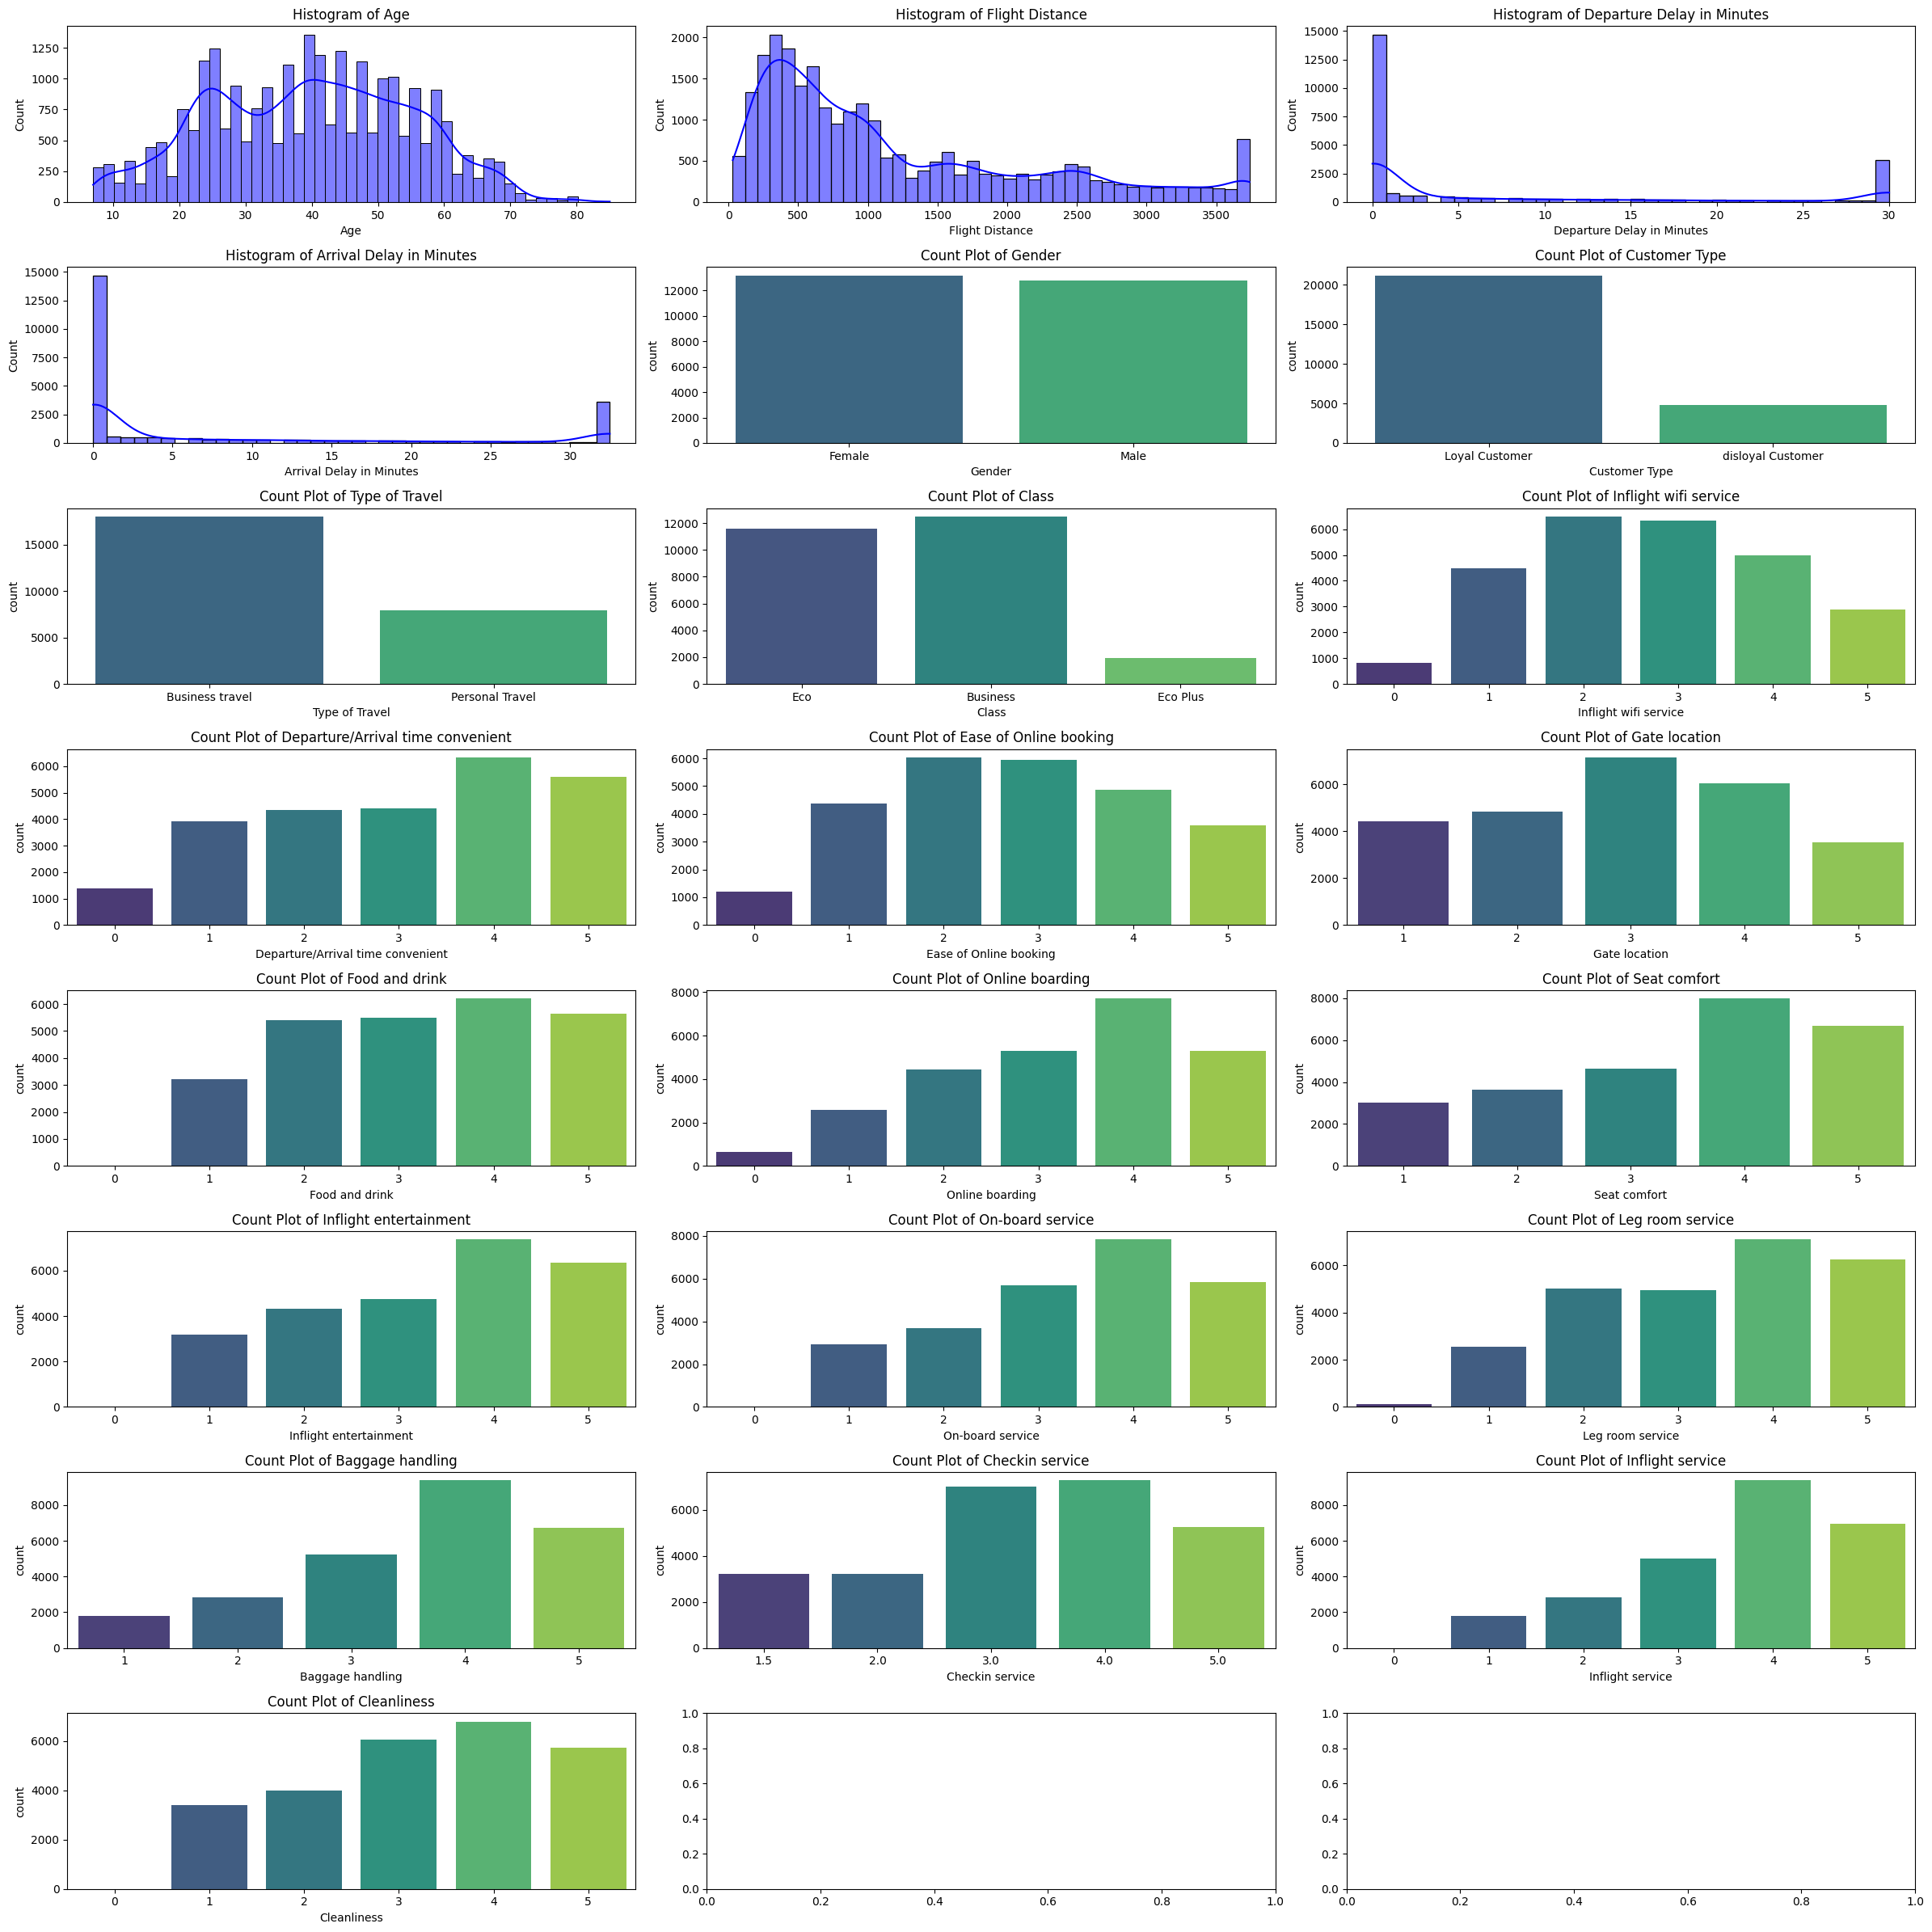

In [ ]:
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(24, 24))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Histogram of {col}')

# Plot bar plots for categorical features
for j, col in enumerate(categorical_columns):
    if i + 1 + j < len(axes):
        sns.countplot(x=df[col], ax=axes[i + 1 + j], palette='viridis')
        axes[i + 1 + j].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

## Bivariate EDA

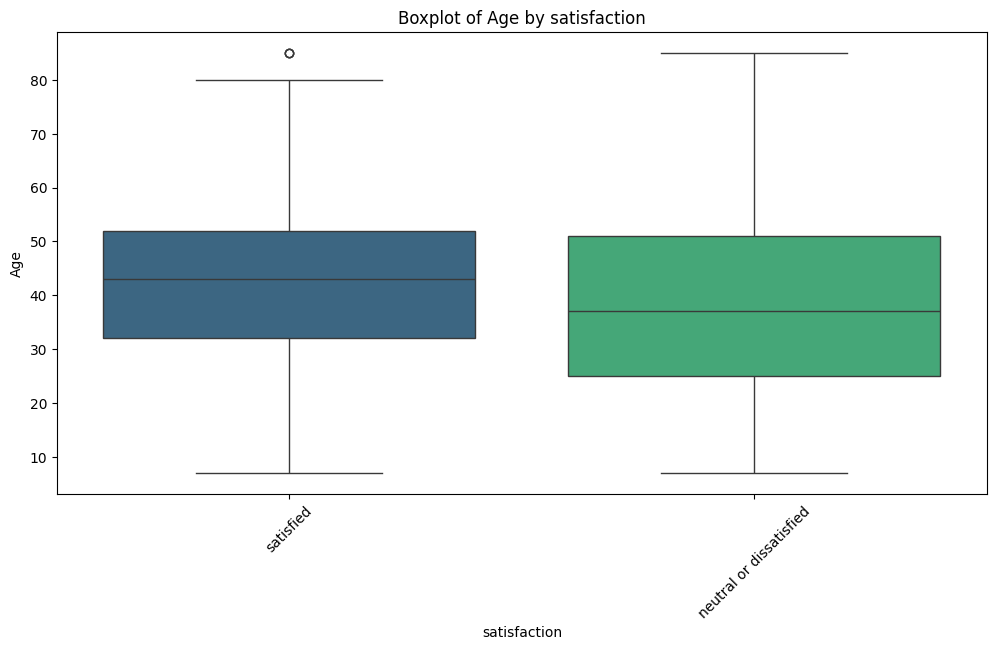

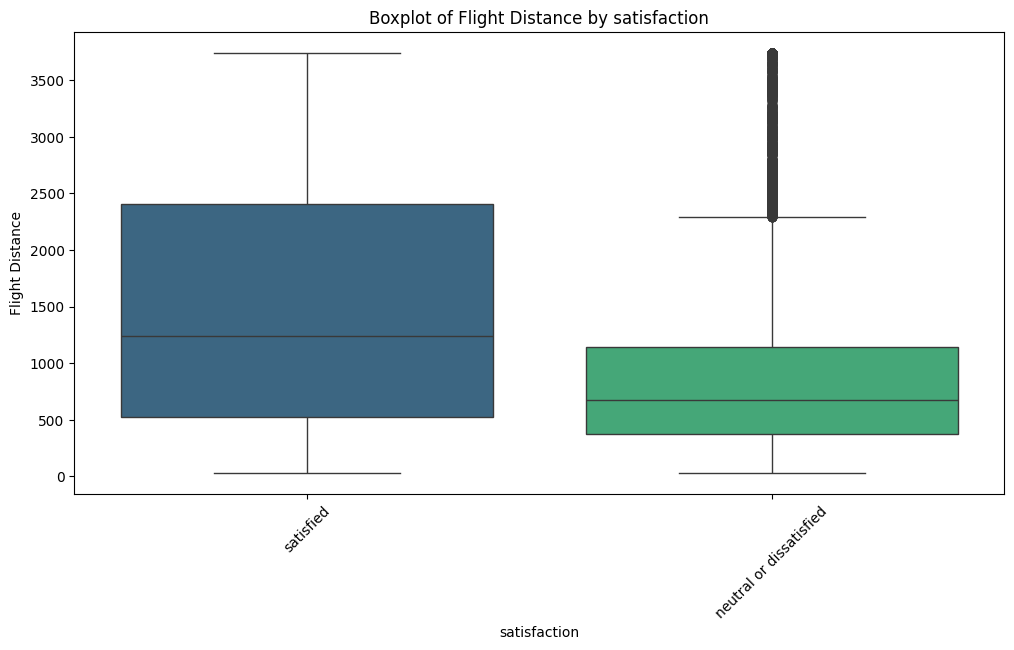

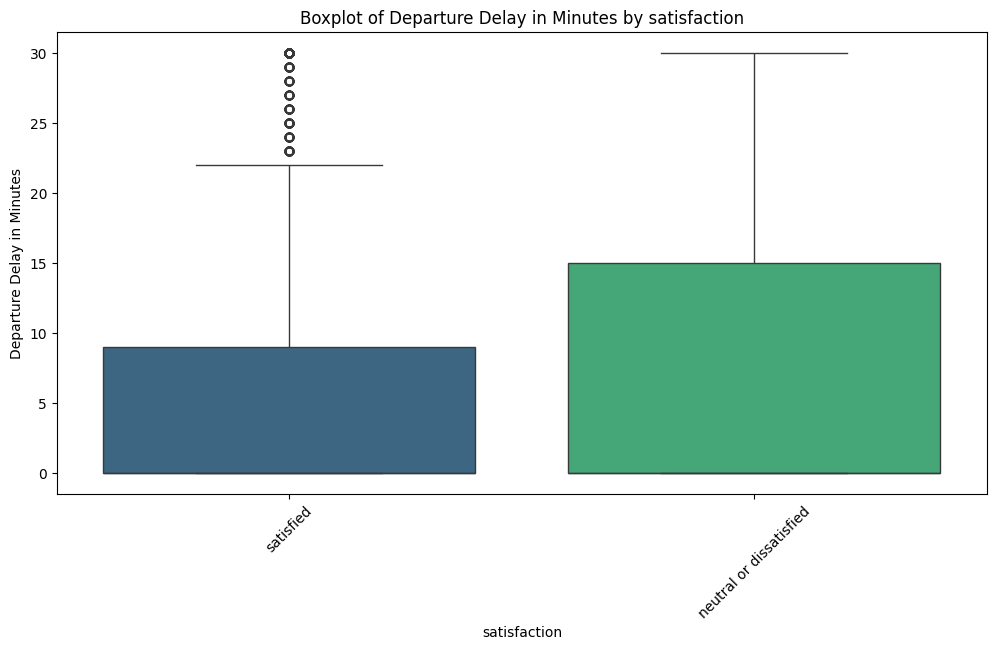

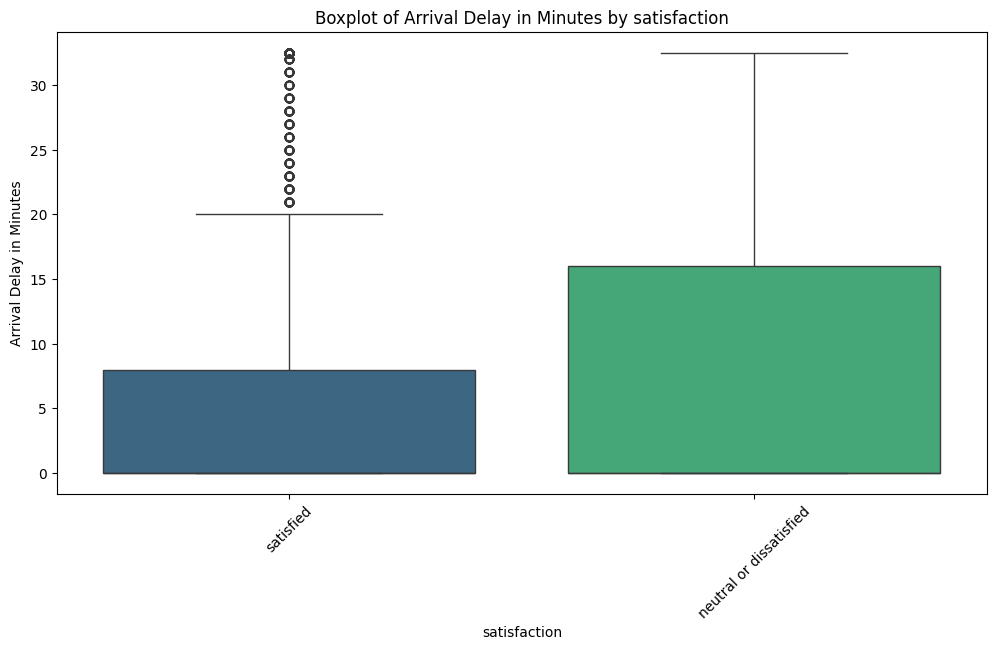

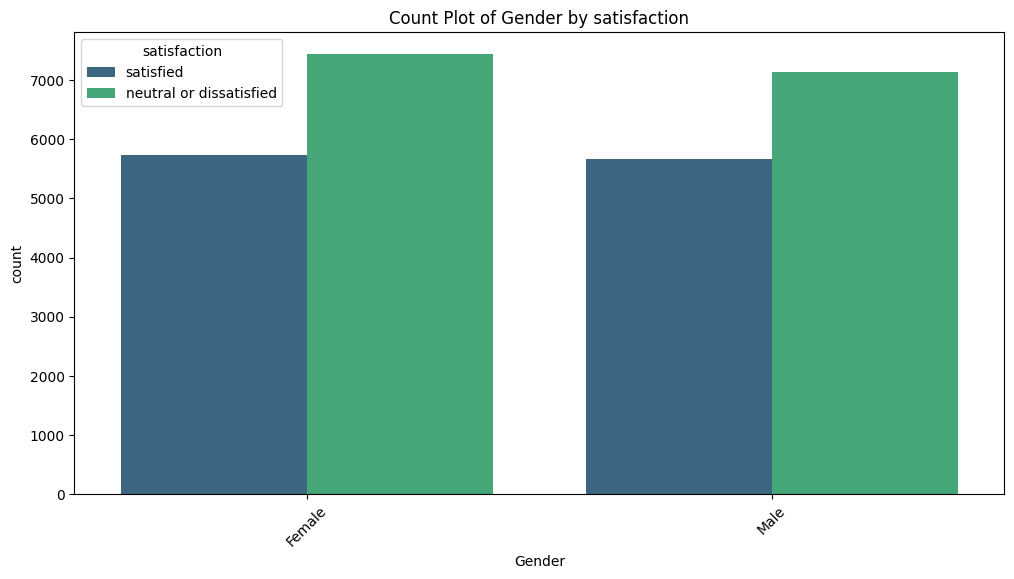

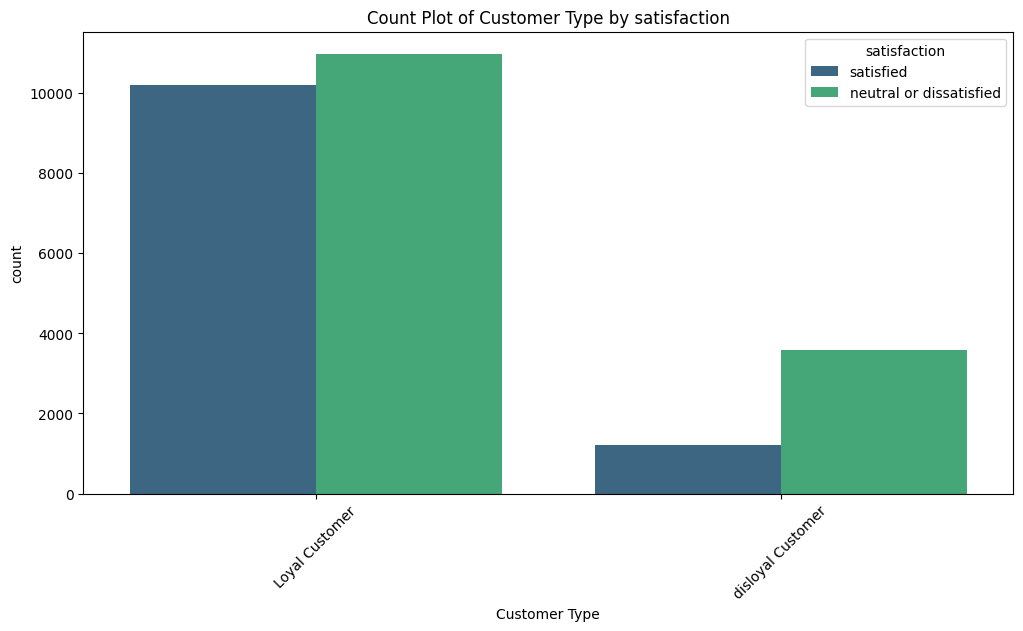

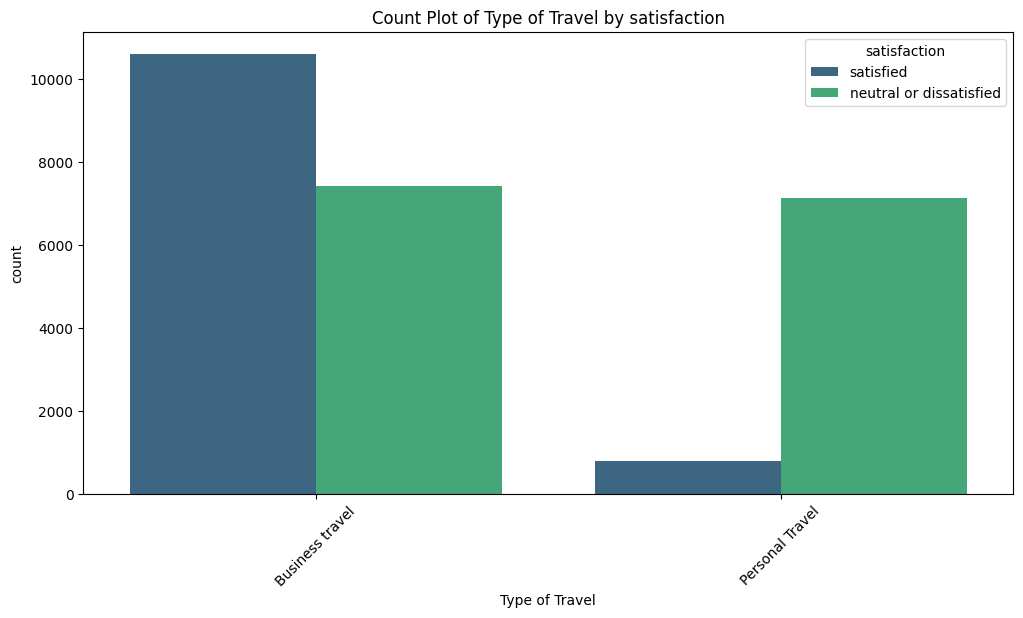

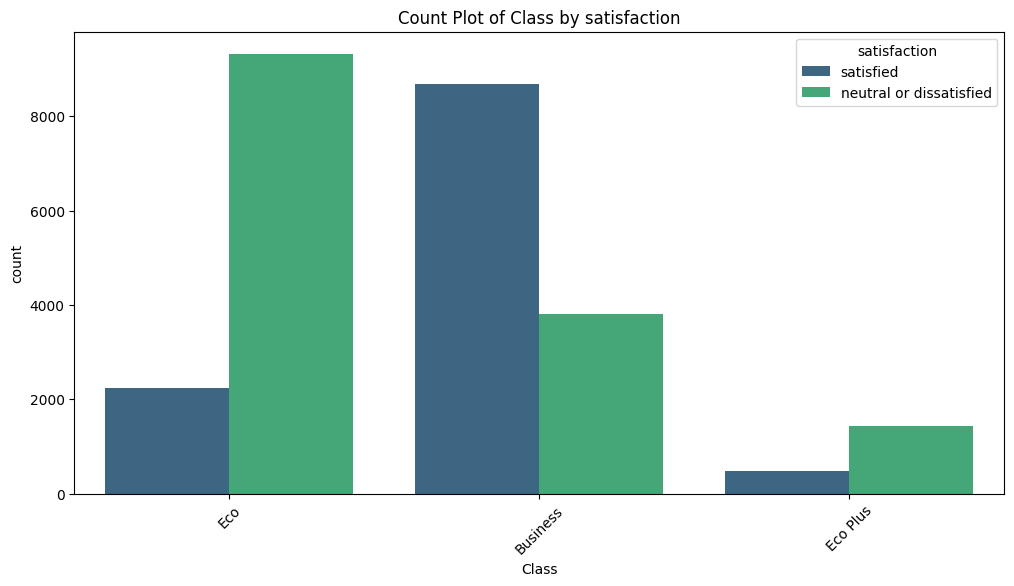

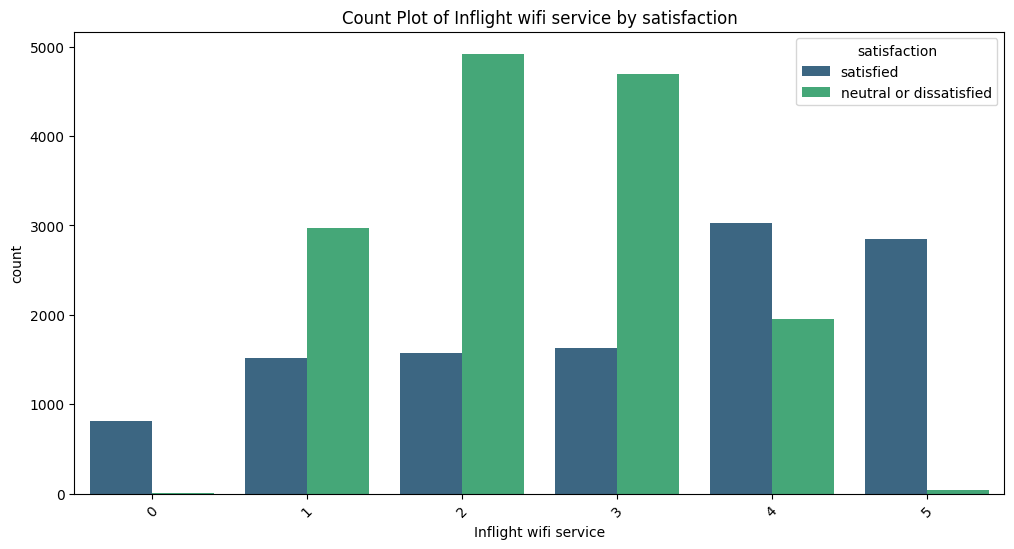

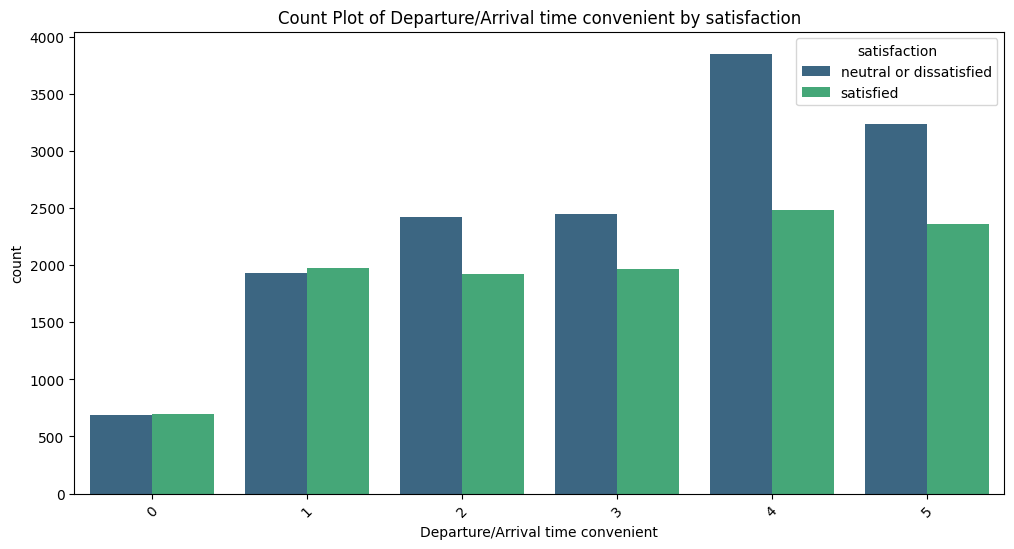

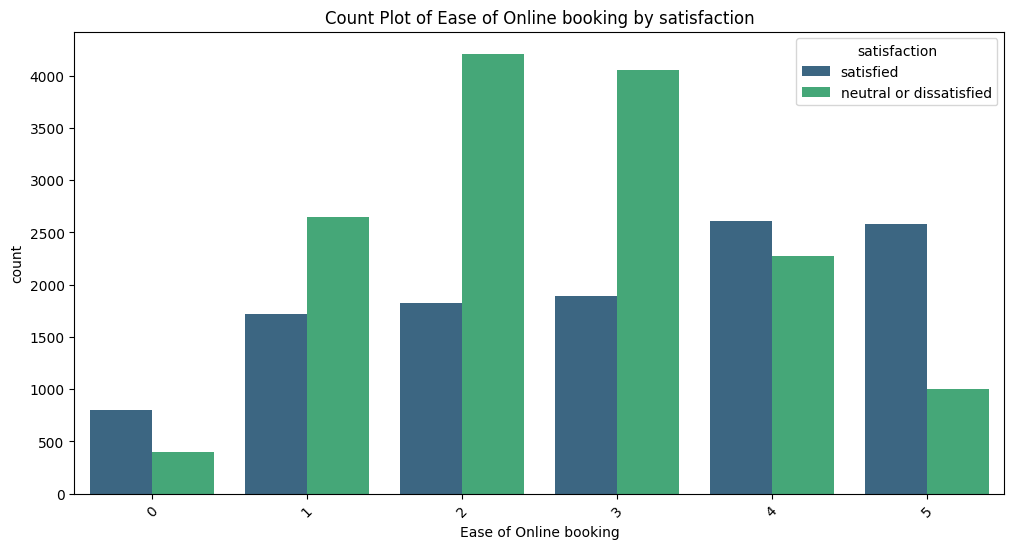

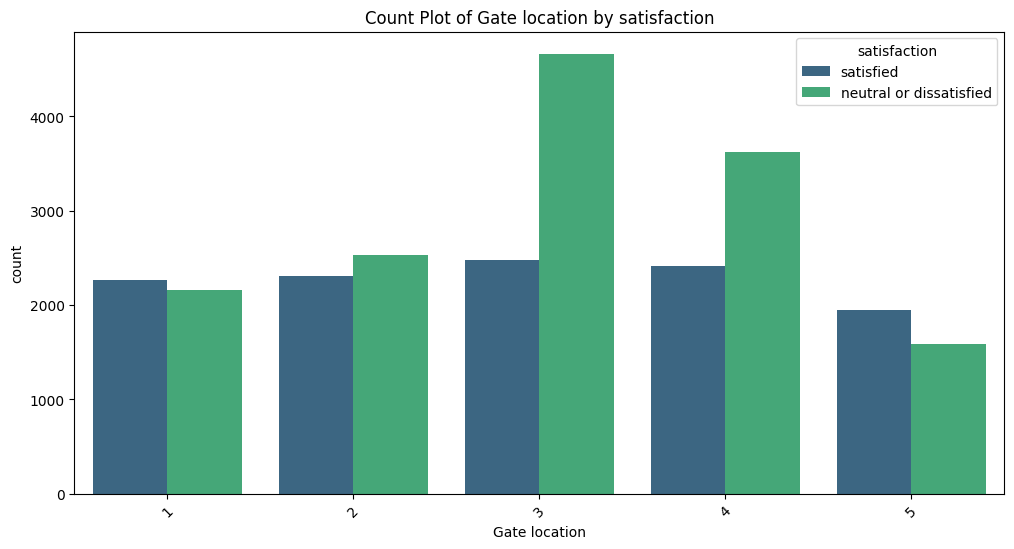

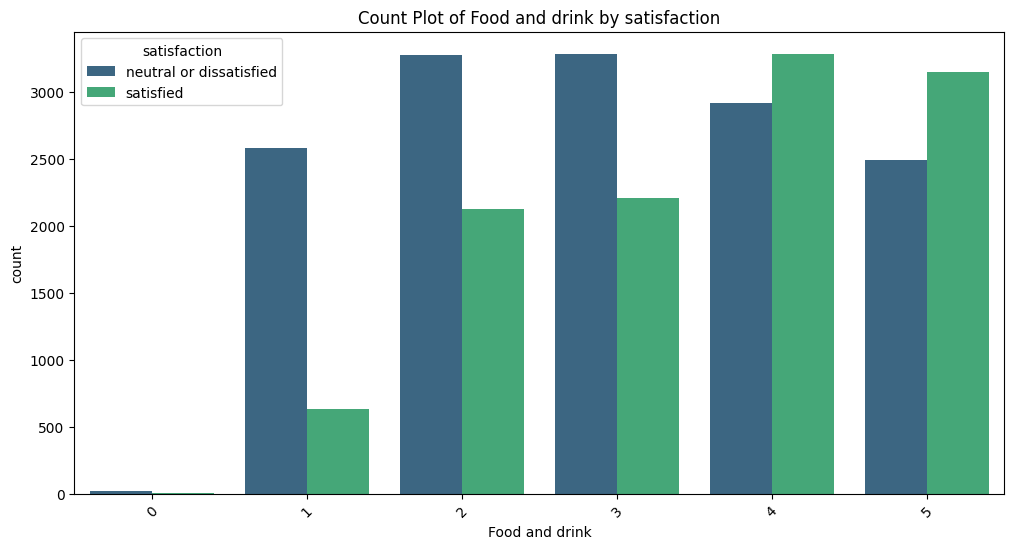

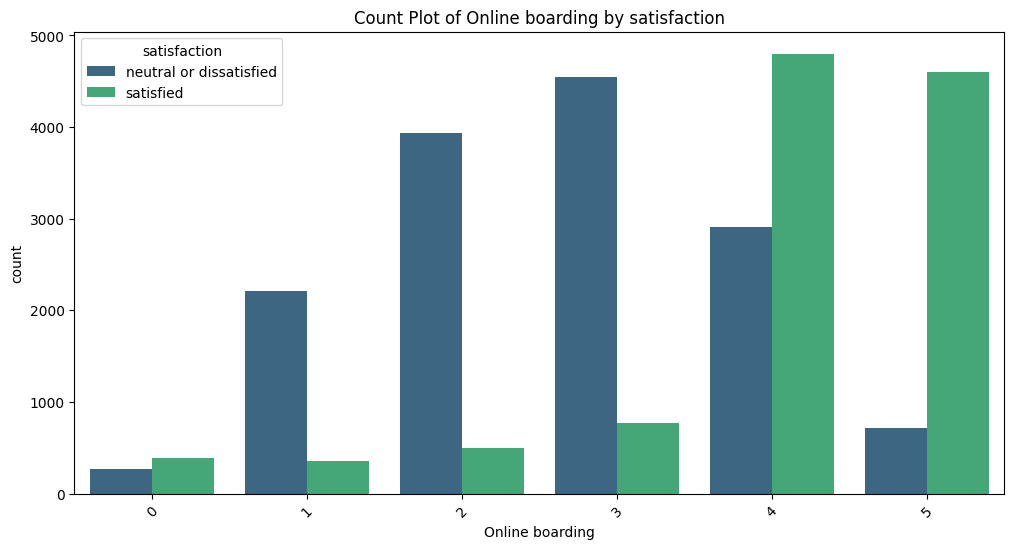

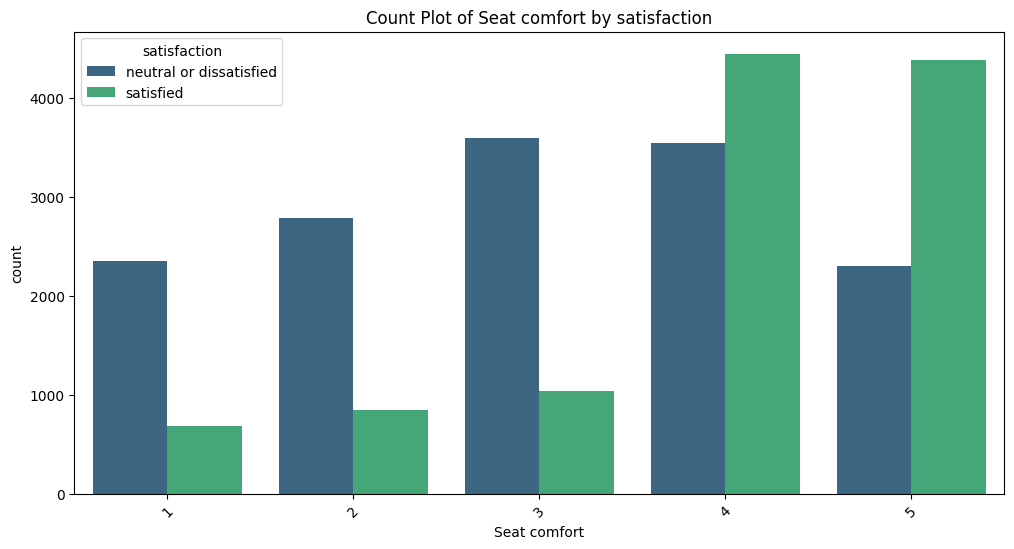

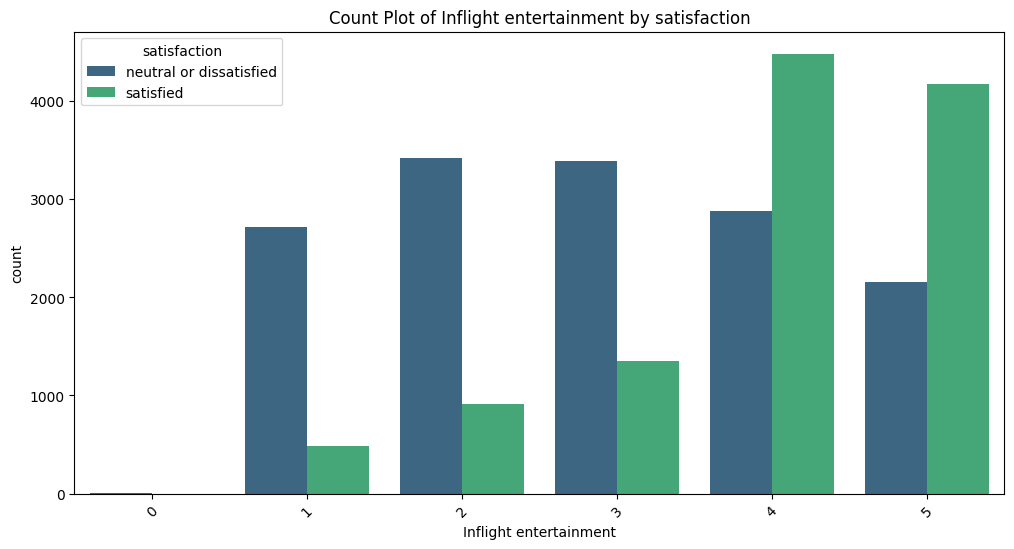

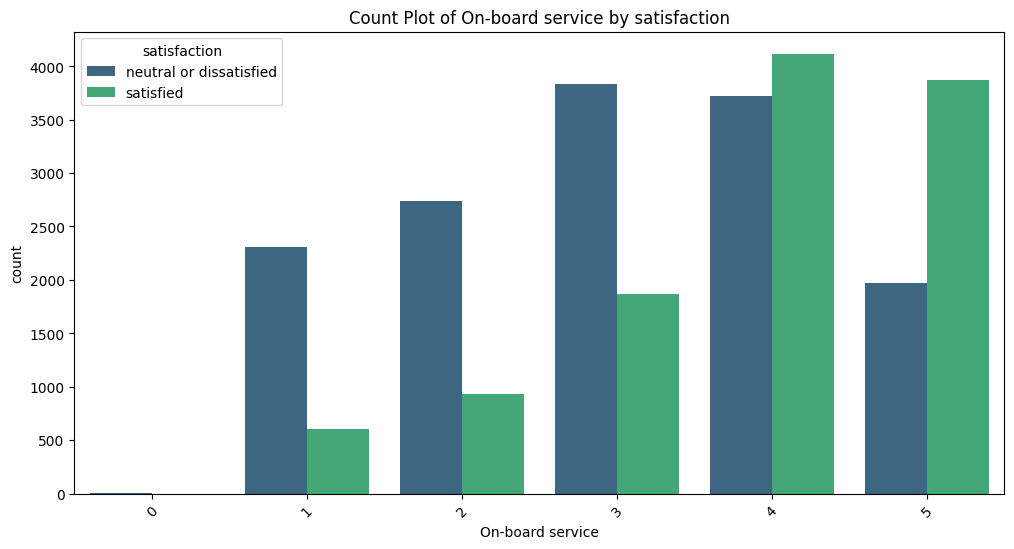

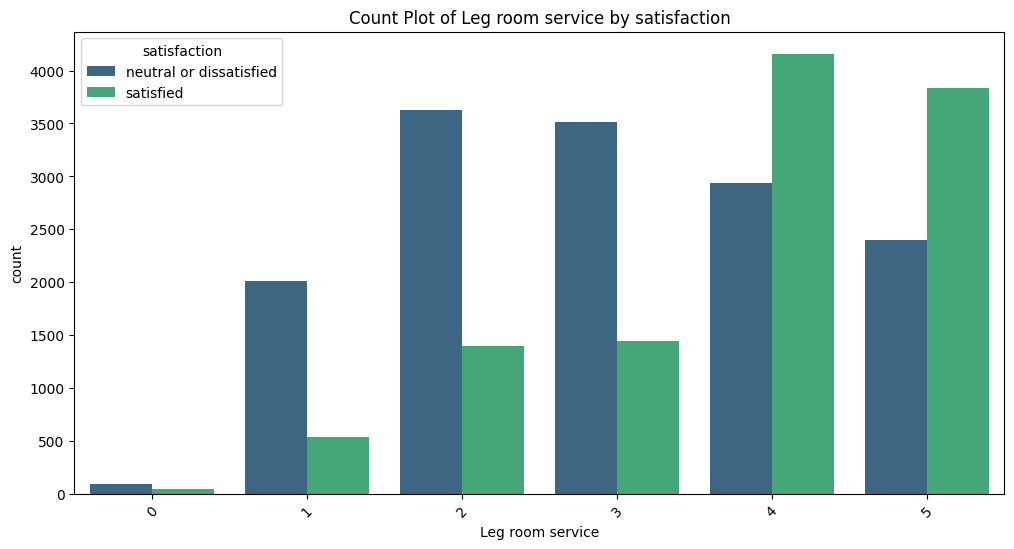

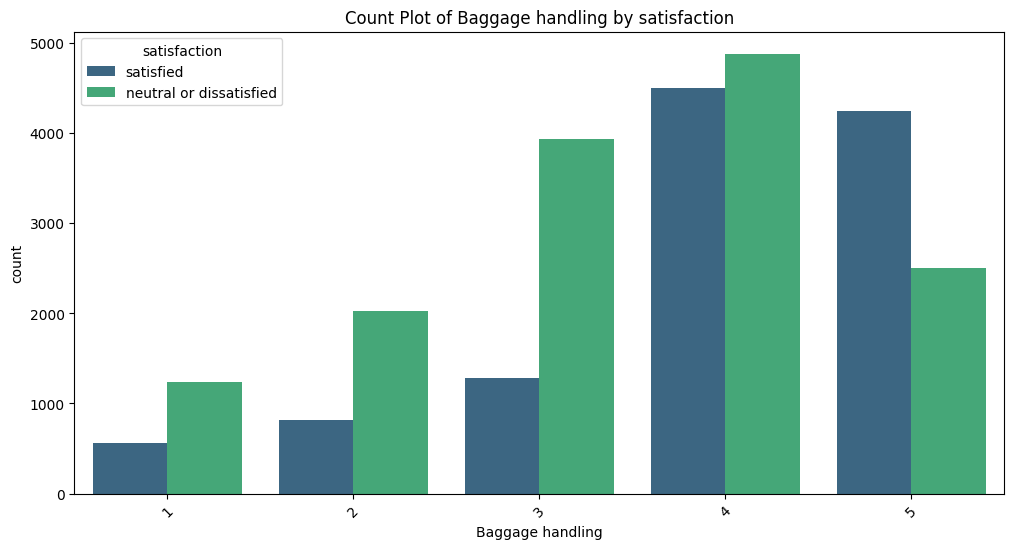

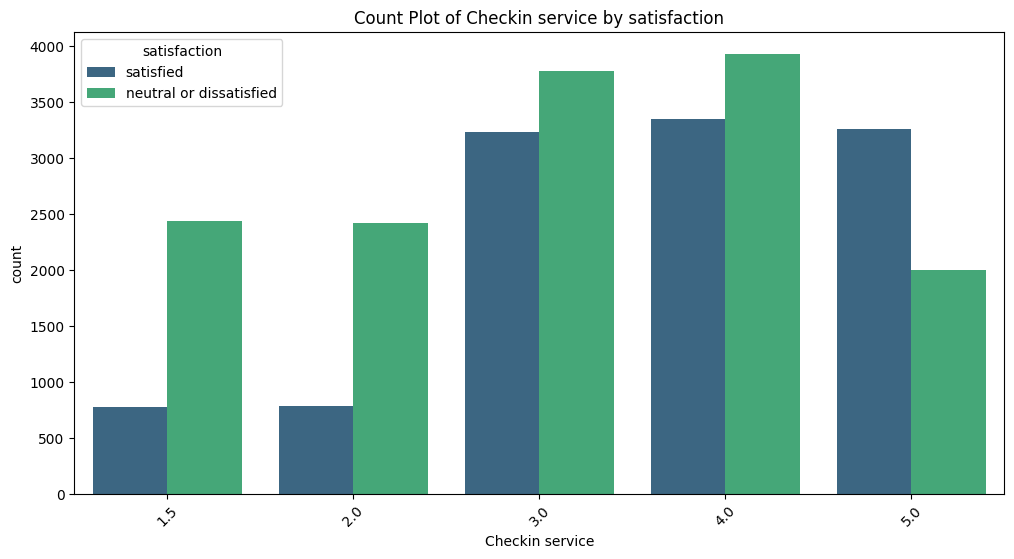

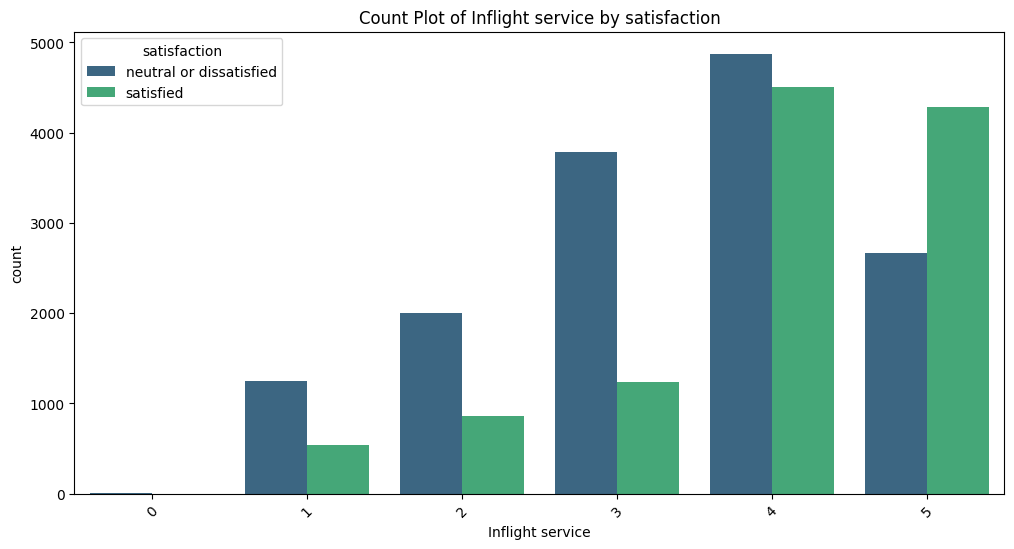

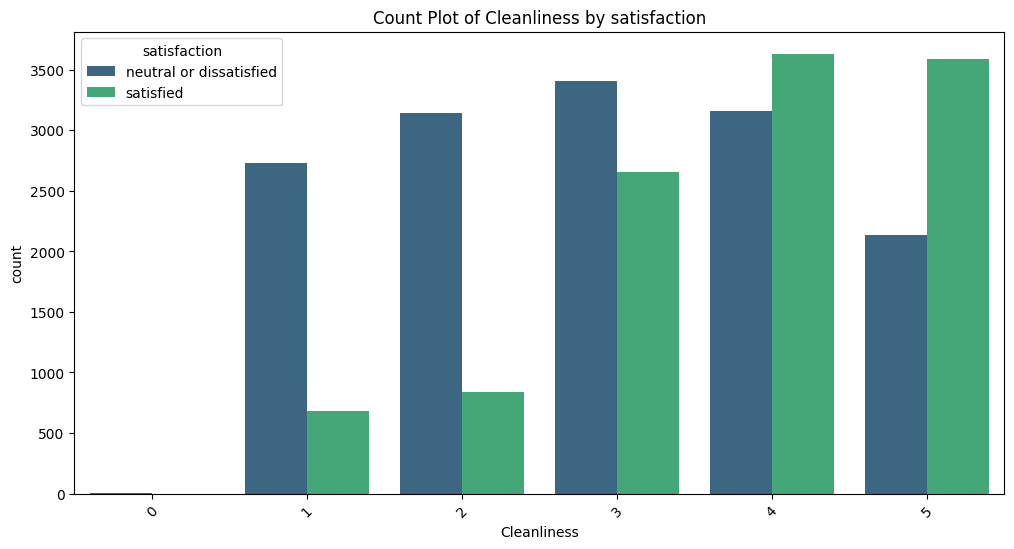

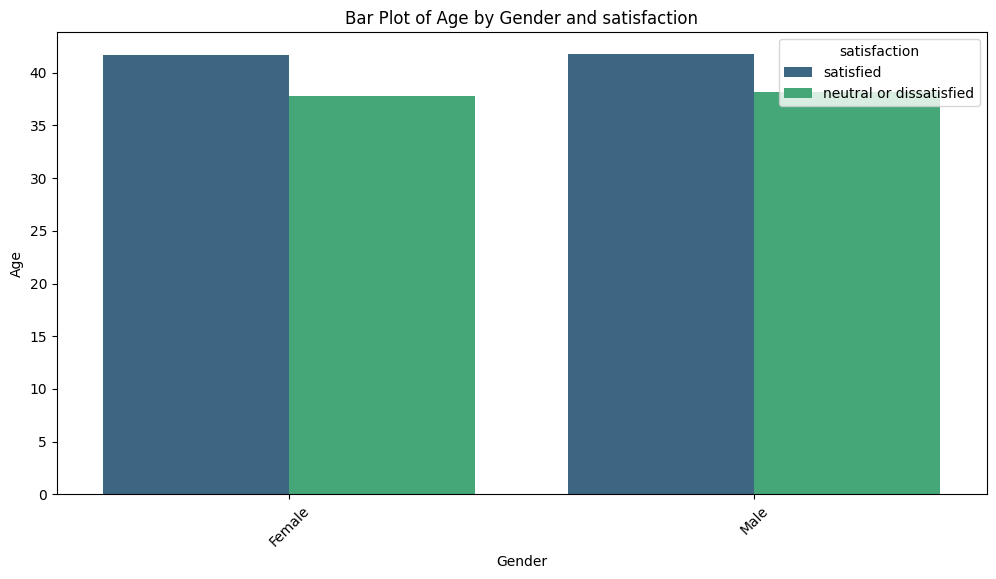

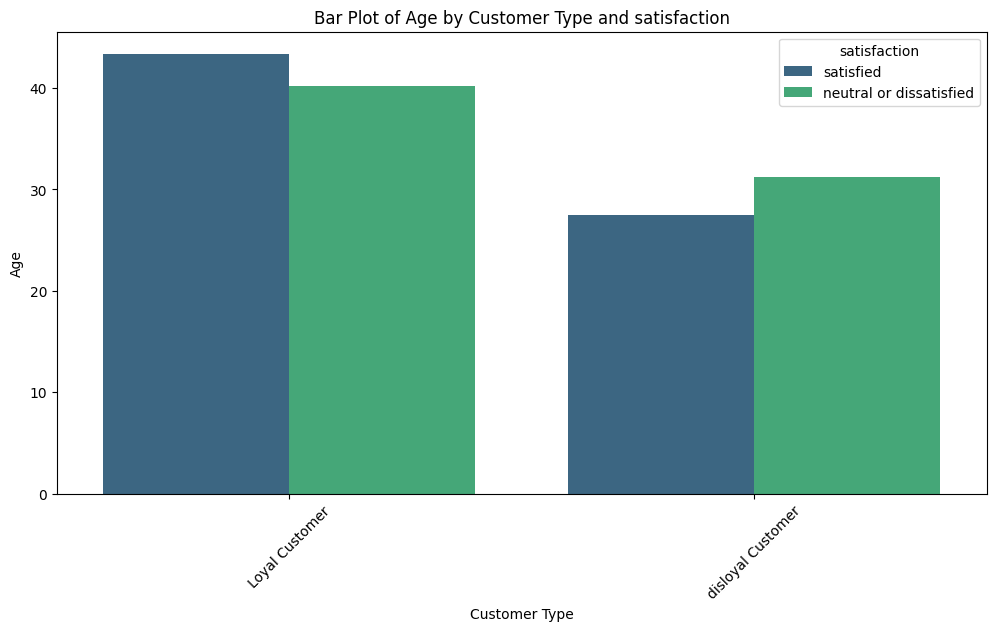

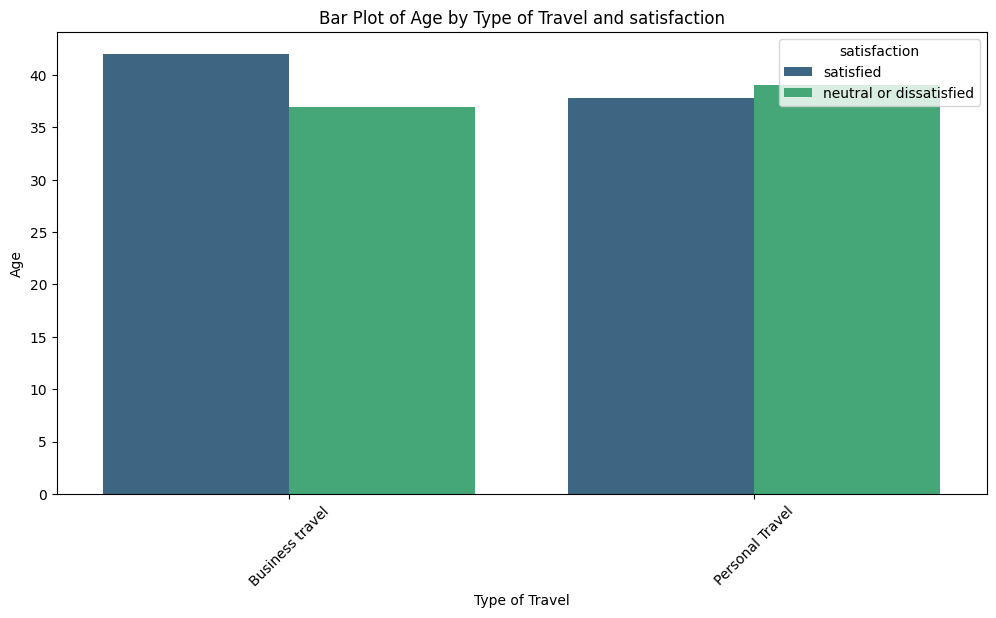

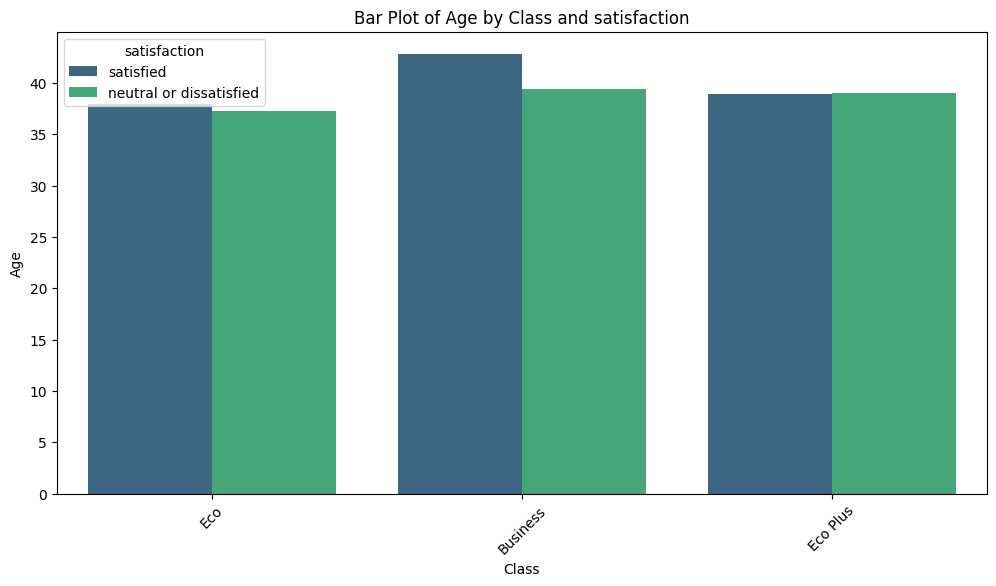

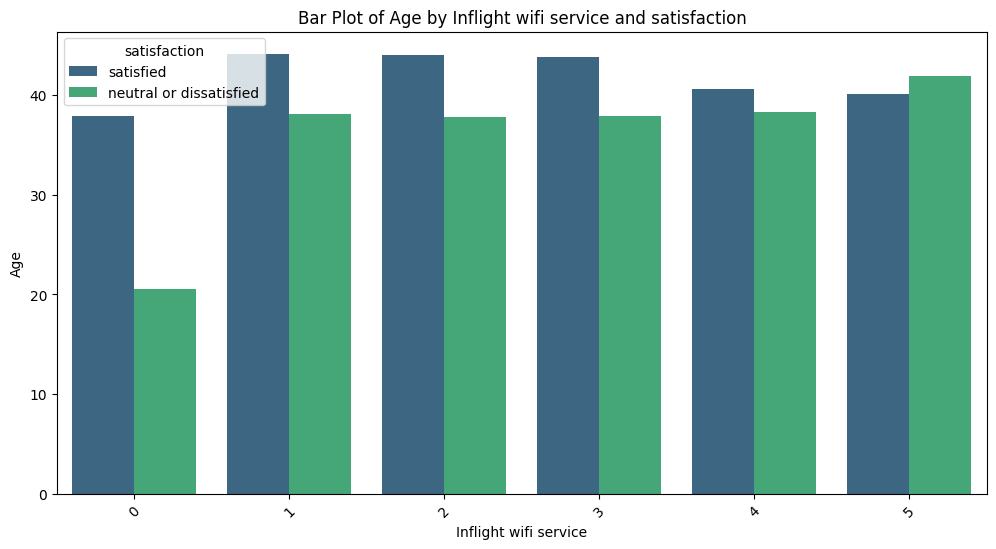

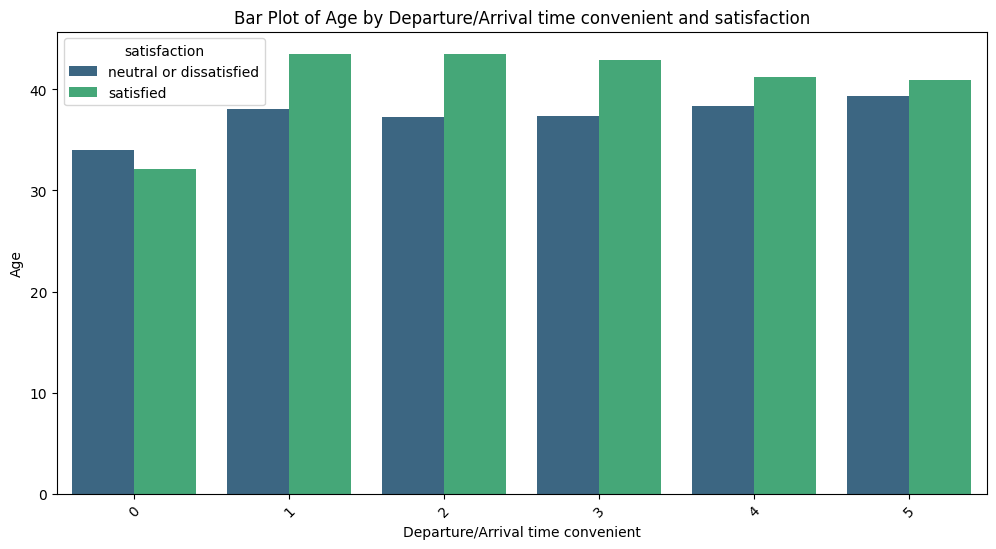

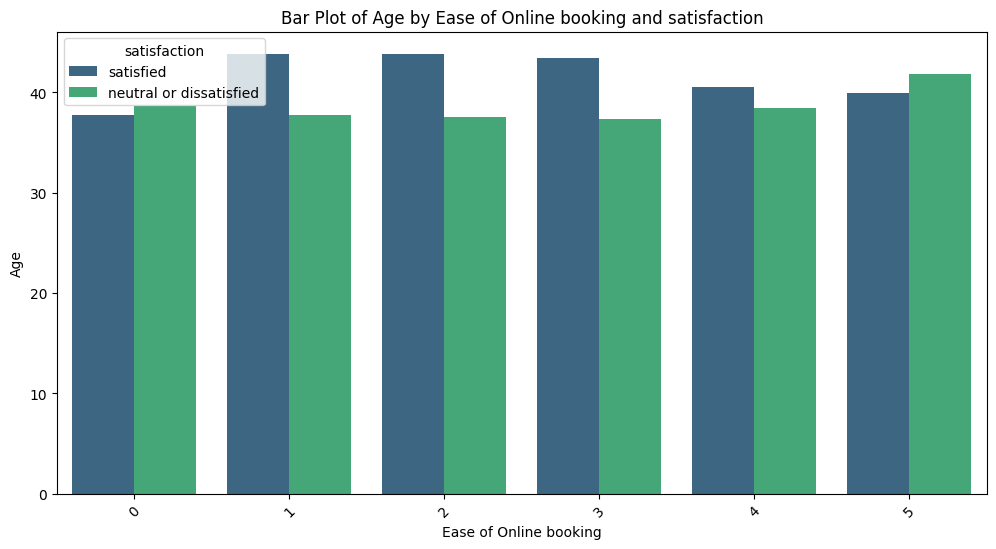

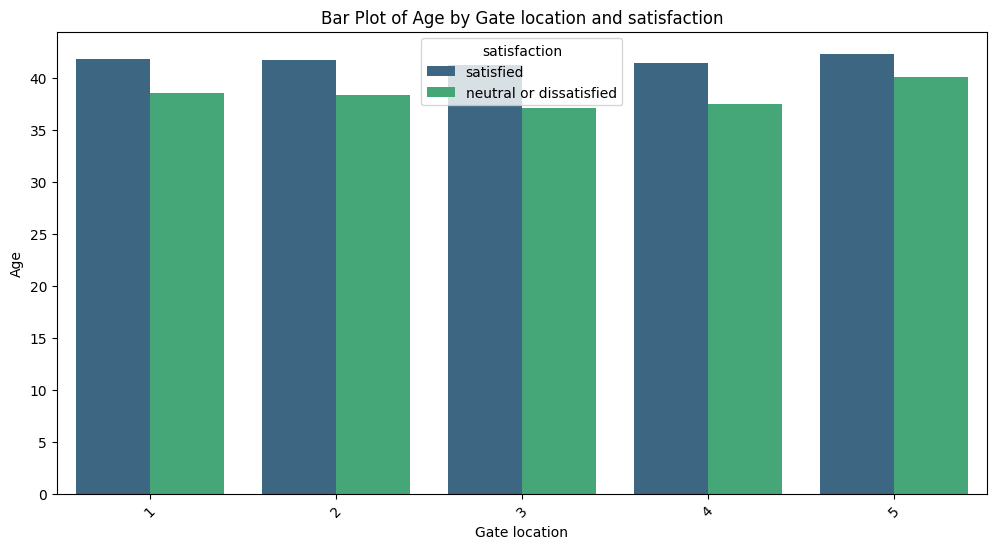

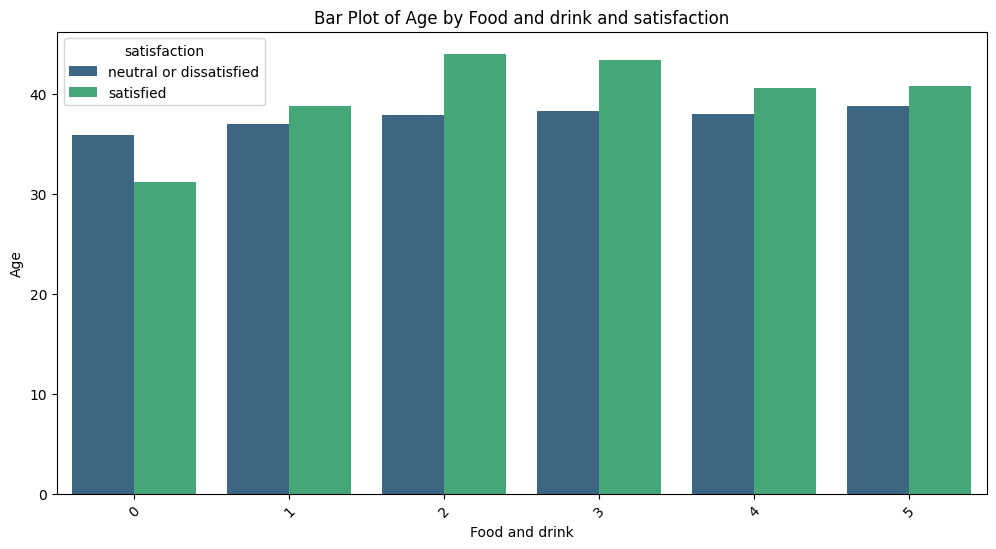

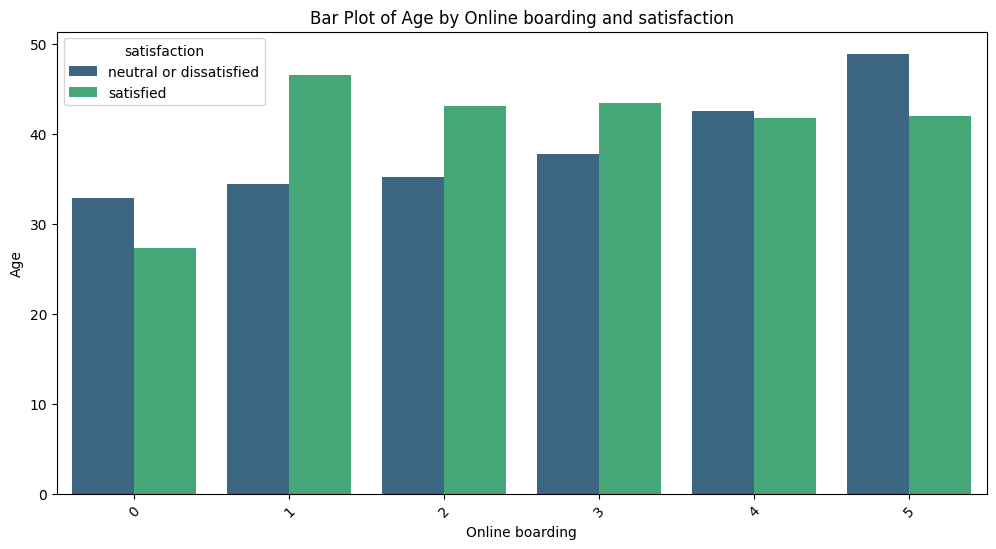

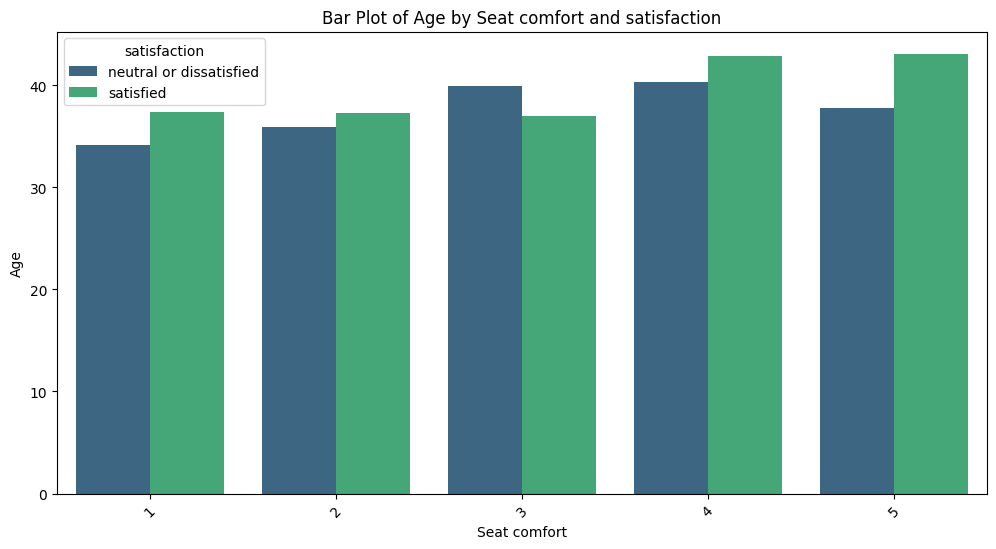

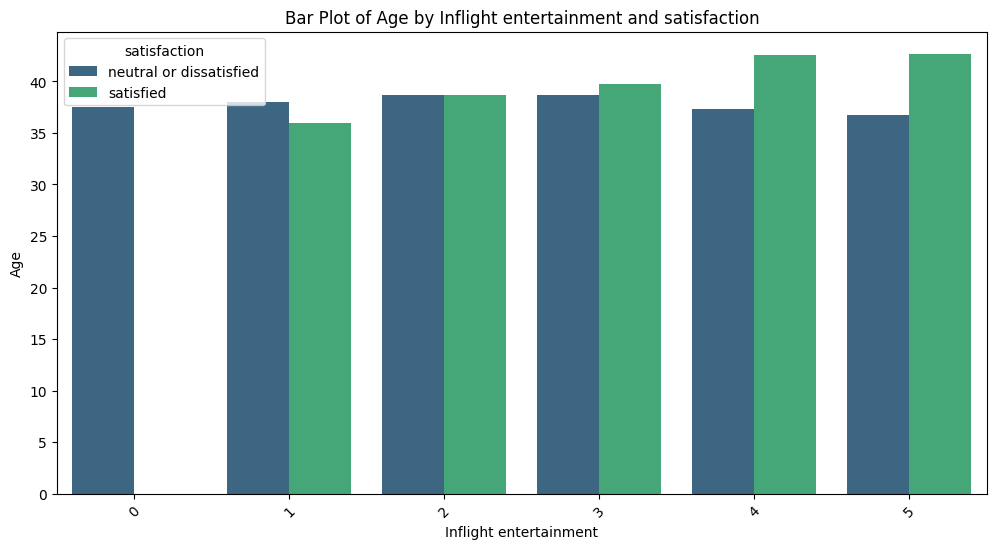

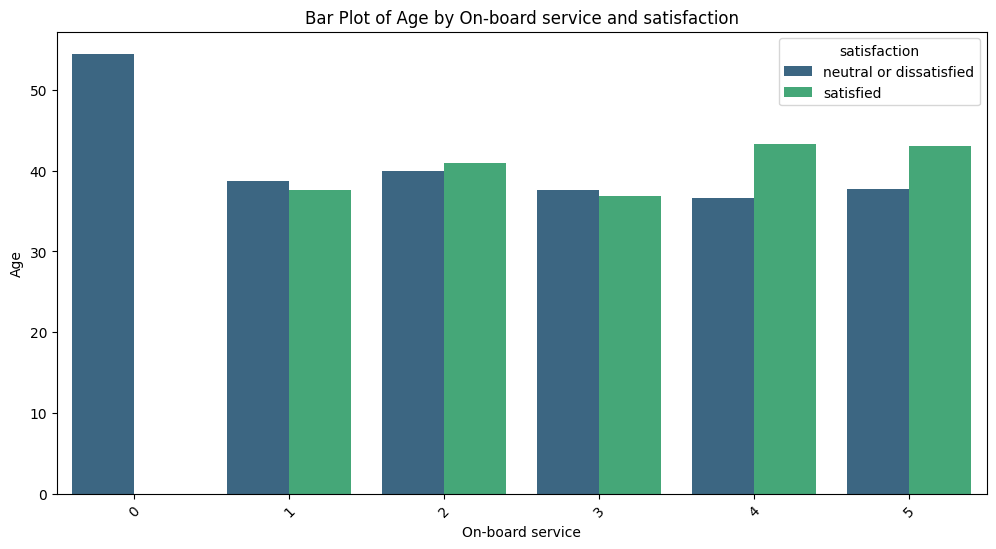

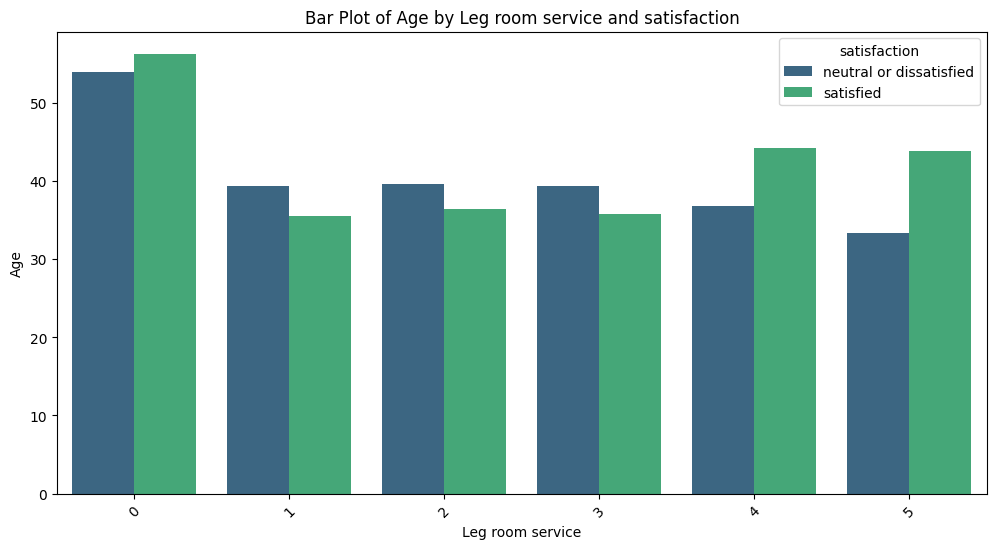

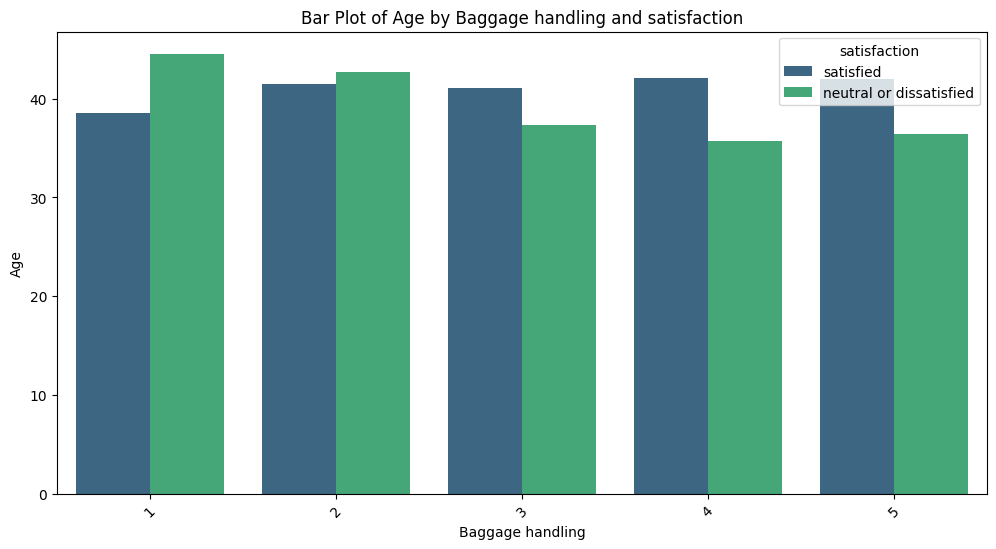

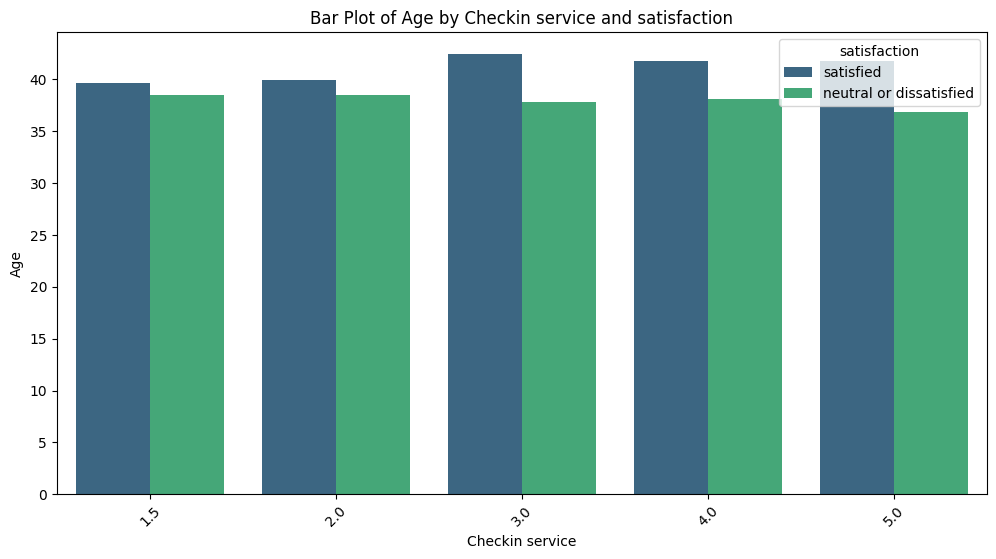

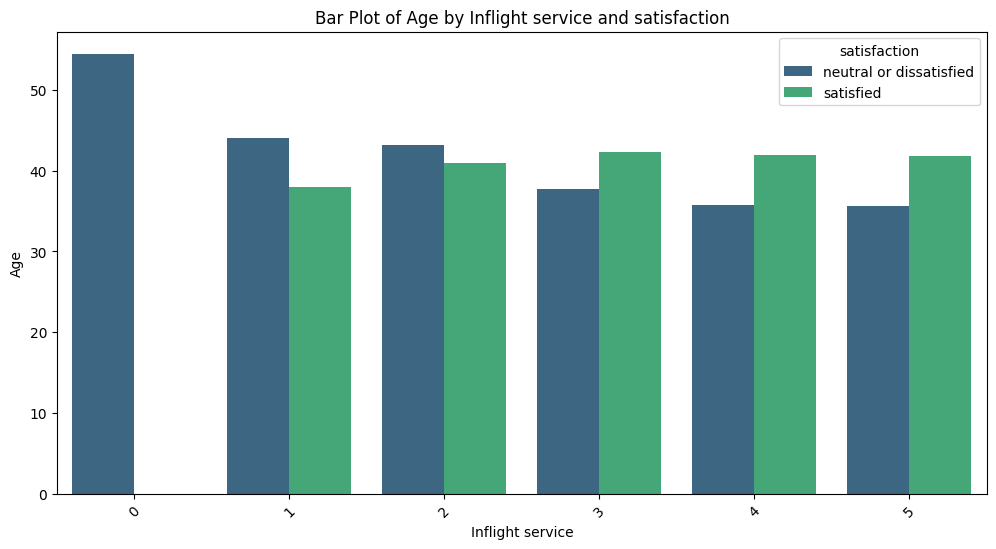

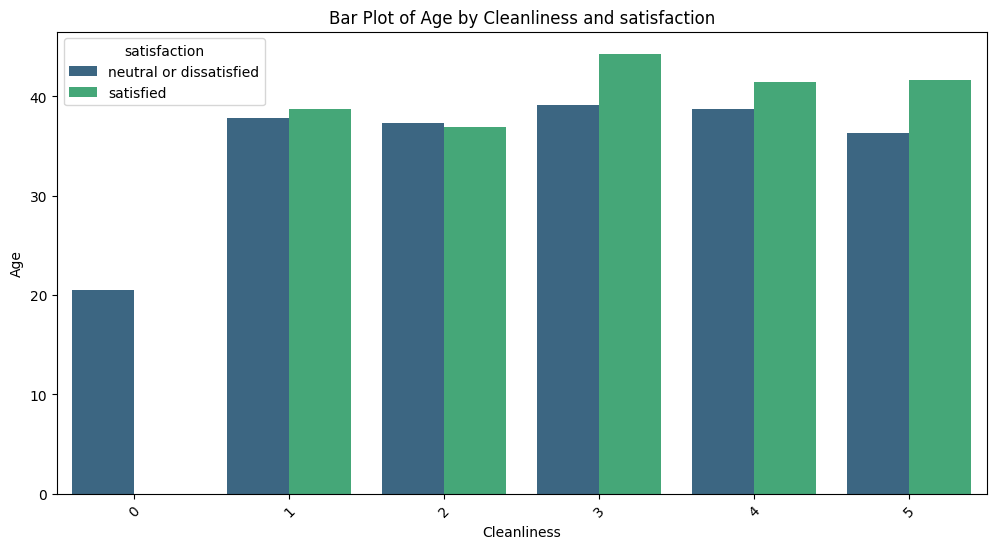

In [ ]:
target_column = 'satisfaction'

# Numerical vs. Categorical
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[target_column], y=df[col], palette='viridis')
    plt.title(f'Boxplot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. Categorical
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=df[col], hue=df[target_column], palette='viridis')
    plt.title(f'Count Plot of {col} by {target_column}')
    plt.xticks(rotation=45)
    plt.show()

# Categorical vs. Numerical (Bar plots with average values)
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df[col], y=df[numerical_columns[0]], hue=df[target_column], palette='viridis', ci=None)
    plt.title(f'Bar Plot of {numerical_columns[0]} by {col} and {target_column}')
    plt.xticks(rotation=45)
    plt.show()

### Multivariate EDA

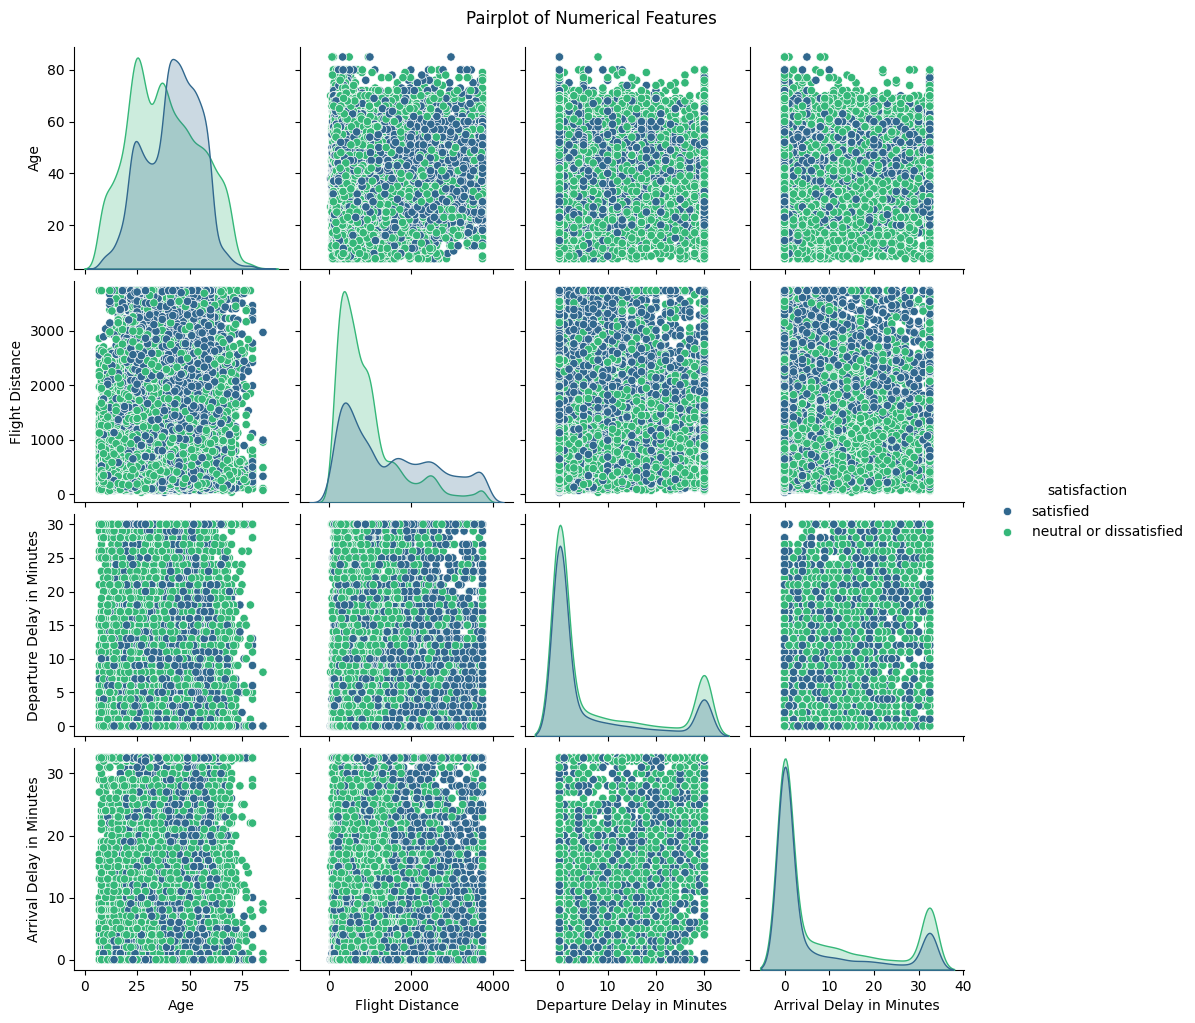

In [ ]:
sns.pairplot(df[numerical_columns + [target_column]], hue=target_column, palette='viridis')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

## IMPORTANT INSIGHTS

* Majority of people who travel are from Age-group 20-40 . This age group is of youngsters like students , working professionals , tourists , buisness man, etc.
* Most of people only tavel for upto 1000km distance. As only tourist people travel for long distances.
* Most of flights are not delayed but if they are delayed they are delayed for more than 24 hours.Gnerally flights are delayed due to extreme weather conditions and if weather is bad it generally remains bad for quite a time.
* Female travels slightly more than Males.
* Most of flight customers are loyal which means they have taken thsi flight previously too.
* Most of people travel for buisness purposes.
* Most people travel in Buisness and Eco Class . Eco Plus price is generally between these two classes and just offfers some basic amenties like leg-room , etc which many people dont find valuable enough.
* Flight wifi service is average . They should make it better.
* They should focus on their online booking technolgy as people are facing problem due to this.
* Seat Comfort and Inflight service is also not that good.

## 4. FEATURE ENGINEERING

In [ ]:
### Make a new column using Feature Construction ( Domain Knowledge )

df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [ ]:
df['Delay Ratio'] = df['Total Delay'] / (df['Flight Distance'] + 1)

In [ ]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2.0,5,5,30,32.5,satisfied,62.5,0.388199


In [ ]:
### Convert Age using Binning
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Youngster', 'Adult', 'Senior'])

In [ ]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2.0,5,5,30,32.5,satisfied,62.5,0.388199,Senior


In [ ]:
df.dtypes

,0
Gender,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Inflight wifi service,int64
Departure/Arrival time convenient,int64
Ease of Online booking,int64
Gate location,int64


In [ ]:
### Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Age Group']

label_mappings = {}

for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))


for col, mapping in label_mappings.items():
    print(f"Mapping for {col}: {mapping}")

Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Customer Type: {'Loyal Customer': 0, 'disloyal Customer': 1}
Mapping for Type of Travel: {'Business travel': 0, 'Personal Travel': 1}
Mapping for Class: {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Mapping for satisfaction: {'neutral or dissatisfied': 0, 'satisfied': 1}
Mapping for Age Group: {'Adult': 0, 'Child': 1, 'Senior': 2, 'Youngster': 3}


In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total Delay', 'Delay Ratio', 'Age Group'],
      dtype='object')

In [ ]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,0,0,52,0,1,160,5,4,3,4,3,4,3,5,5,5,5,2.0,5,5,30,32.5,1,62.5,0.388199,2


In [ ]:
### Feature Selection

from sklearn.model_selection import train_test_split

X = df.drop(columns='satisfaction')
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information
mutual_info = mutual_info_classif(X_train, y_train, discrete_features=True)

# Create a DataFrame for mutual information
mutual_info_df = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mutual_info
}).sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)

                              Feature  Mutual Information
23                        Delay Ratio            0.264379
11                    Online boarding            0.211570
6               Inflight wifi service            0.163600
5                     Flight Distance            0.136166
4                               Class            0.129484
3                      Type of Travel            0.114268
13             Inflight entertainment            0.093604
12                       Seat comfort            0.077395
15                   Leg room service            0.058236
14                   On-board service            0.056689
19                        Cleanliness            0.055825
8              Ease of Online booking            0.048218
2                                 Age            0.046787
16                   Baggage handling            0.043619
18                   Inflight service            0.040335
17                    Checkin service            0.035305
10            

In [ ]:
#### Create our final dataframe with important features

top_features = mutual_info_df.head(12)['Feature'].tolist()

In [ ]:
final_df = df[top_features + ['satisfaction']]

In [ ]:
final_df.head(3)

,Delay Ratio,Online boarding,Inflight wifi service,Flight Distance,Class,Type of Travel,Inflight entertainment,Seat comfort,Leg room service,On-board service,Cleanliness,Ease of Online booking,satisfaction
0,0.388199,4,5,160,1,0,5,3,5,5,5,3,1
1,0.000000,4,1,2863,0,0,4,5,4,4,5,3,1
2,0.000000,2,2,192,1,0,2,2,1,4,2,2,0


In [ ]:
# Checking Imbalanced Data
final_df["satisfaction"].value_counts()

,count
satisfaction,
0,14573
1,11403


## 5. Model Training

In [ ]:
final_df.columns

Index(['Delay Ratio', 'Online boarding', 'Inflight wifi service',
       'Flight Distance', 'Class', 'Type of Travel', 'Inflight entertainment',
       'Seat comfort', 'Leg room service', 'On-board service', 'Cleanliness',
       'Ease of Online booking', 'satisfaction'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Sample 10% of the data
df_sample = final_df.sample(frac=0.05, random_state=42)

# Prepare the sample data
X_sample = final_df.drop(columns='satisfaction')
y_sample = final_df['satisfaction']


# Split the sampled data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50),
    'AdaBoost': AdaBoostClassifier(n_estimators=50),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss')
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_sample, y_train_sample)
    y_pred = clf.predict(X_test_sample)
    accuracy = accuracy_score(y_test_sample, y_pred)
    results[name] = accuracy

# Print results
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9152, number of negative: 11628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 20780, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440423 -> initscore=-0.239444
[LightGBM] [Info] Start training from score -0.239444
Logistic Regression: 0.8245
Random Forest: 0.9315
Gradient Boosting: 0.9144
AdaBoost: 0.8897
Support Vector Classifier: 0.6680
K-Nearest Neighbors: 0.8087
Naive Bayes: 0.8457
Decision Tree: 0.9132
LightGBM: 0.9353
XGBoost: 0.9334


In [ ]:
### We know now LGBM is the best model for us

In [ ]:
### Making LGBM MODEL

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb

In [ ]:
X = final_df.drop(columns='satisfaction')
y = final_df['satisfaction']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9152, number of negative: 11628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 20780, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.440423 -> initscore=-0.239444
[LightGBM] [Info] Start training from score -0.239444


LGBMClassifier()

In [ ]:
y_pred = lgbm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9353
Precision: 0.9354
Recall: 0.9353
F1 Score: 0.9352


In [ ]:
### We dont do hyperparamter tuning as there was a risk of overfitting as model is already performing quite good

## 6. MODEL SAVING

In [ ]:
import pickle

with open('lgbm_model.pkl', 'wb') as file:
    pickle.dump(lgbm_model, file)


## 7. MODEL LOADING AND TESTING

In [ ]:
with open('lgbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
X_train[8:15]

,Delay Ratio,Online boarding,Inflight wifi service,Flight Distance,Class,Type of Travel,Inflight entertainment,Seat comfort,Leg room service,On-board service,Cleanliness,Ease of Online booking
24292,0.000000,2,3,812,0,1,4,3,3,4,4,3
25944,0.000000,3,2,2390,0,0,4,4,3,4,3,3
16069,0.004953,5,5,2018,0,0,4,4,4,4,3,5
8146,0.004016,1,1,248,1,0,1,1,1,3,1,4
1535,0.000000,4,5,1678,0,0,5,4,5,5,1,5
2878,0.017792,5,2,1910,0,0,5,5,5,5,4,2
5140,0.180636,4,4,345,1,0,4,4,3,5,4,4


In [ ]:
y_train[8:15]

,satisfaction
24292,0
25944,0
16069,1
8146,0
1535,1
2878,1
5140,1


In [ ]:
X_new = np.array([
    [5 , 0.000000 ,4 ,0, 0,	2 ,3736.5, 5, 2, 2,	4,	3],
    [2	, 0.000000 , 	2 , 1	, 1 ,3	,986.0 ,	3 ,	4 ,	4	, 2	, 3]
])

In [ ]:
y_pred_new = loaded_model.predict(X_new)

In [ ]:

print("Predictions:", y_pred_new)


Predictions: [0 0]


In [ ]:
### It is doing pretty good predictions..........................

### WE HAVE OUR ML MODEL NOW

### Let's Go to APP Building